<a href="https://colab.research.google.com/github/MCK-OOTS/DataVisualization/blob/main/DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 최근 심각한 사회문제로 대두되는 대한민국의 출산율과 관련된 데이터 분석

1. KOSIS 국가통계 포털에서 제공하는 2021년도 까지의 2000년대의 데이터를 분석










     print(json.dumps(data, indent=4, ensure_ascii=False))  

In [1]:
#한글 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
#출산율
import requests
import json
import pandas as pd


# API URL (KOSIS 국가 통계 포털)
url = "https://kosis.kr/openapi/Param/statisticsParameterData.do"

#요청 파라미터
params = {
    "apiKey": "OWVmNjBiOTgzZjhiNzYyNjYwNjU0YWUxYTNkYTAzMWM=",
    "itmId": "T1+", #데이터 분류 코드
    "objL1": "ALL", #데이터 분류 코드
    "format": "json",
    "jsonVD": "Y",
    "prdSe": "Y",
    "newEstPrdCnt": "22",
    "orgId": "101", #데이터 제공 조직 ID (통계청, WorldBank)
    "tblId": "DT_2AX016", #조회 테이블 ID (출산율)
}

# API 요청 보내기
response = requests.get(url, params=params)

# 응답 데이터 확인 및 JSON 데이터 파싱
if response.status_code == 200:
    fertility_data = response.json()

    #전처리
    df_fertility = pd.DataFrame(fertility_data)# list > DataFrame
    df_fertility= df_fertility[['PRD_DE', 'C1_NM', 'DT']]#원하는 데이터 키 값만 저장
    df_fertility= df_fertility[df_fertility['C1_NM'].isin(['대한민국', '일본','프랑스','독일','이탈리아'])]#원하는 국가의 데이터만 저장
    df_fertility.columns = ['연도', '국가', '출산율(명)']# 데이터 컬럼 이름 변경

    #전 세계 데이터
    df_all_fertility = pd.DataFrame(fertility_data)
    df_all_fertility = df_all_fertility [['PRD_DE', 'C1_NM', 'DT']]
    df_all_fertility = df_all_fertility[df_all_fertility['PRD_DE'] == '2021']  # 2021년도 데이터만 저장
    df_all_fertility.columns = ['연도', '국가', '출산율(명)']

    #하위 10개국 데이터만 저장
    df_all_fertility['출산율(명)'] = df_all_fertility['출산율(명)'].astype(float)  #하위 50개 국가 필터링을 위해 데이터를 float로 변경
    df_all_fertility = df_all_fertility.sort_values(by="출산율(명)", ascending=True).head(10) #오름차순 정렬 후 10개의 국가 데이터만 저장

else:
    print(f"Error: {response.status_code}")


<BarContainer object of 10 artists>

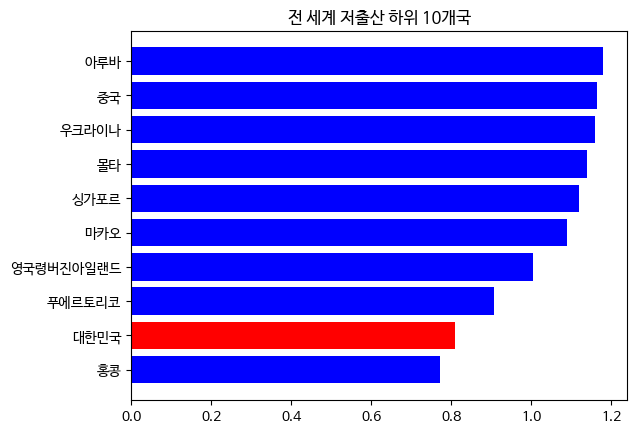

In [3]:
#2021 저출산 10개국가

df_all_fertility['출산율(명)'] = pd.to_numeric(df_all_fertility['출산율(명)'])

plt.title('전 세계 저출산 하위 10개국')
plt.barh(
    df_all_fertility['국가'],
    df_all_fertility['출산율(명)'],
    color=['blue' if country != '대한민국' else 'red' for country in df_all_fertility['국가']]
)

Text(0.5, 1.0, '대한민국, 프랑스, 독일 출산율 추이')

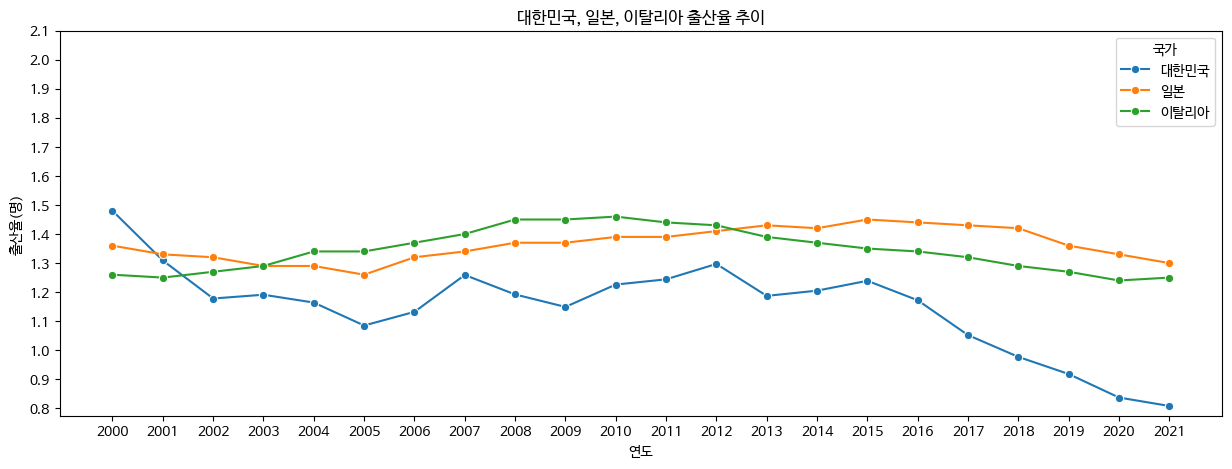

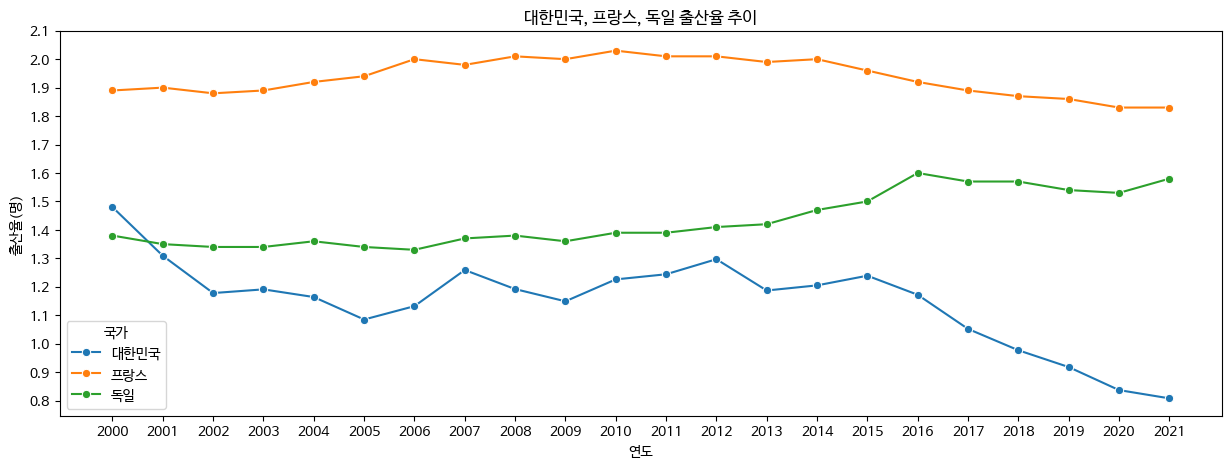

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#데이터가 정수형이라 수치형 데이터로 변환
df_fertility['출산율(명)'] = pd.to_numeric(df_fertility['출산율(명)'])


#대표적인 저출산국가와 높은 출산울(프랑스), 출산율 개선국가(독일)의 출산율 변화 비교
df_high_fertility = df_fertility[df_fertility['국가'].isin(['프랑스', '독일', '대한민국'])]
df_low_fertility = df_fertility[df_fertility['국가'].isin(['일본','이탈리아','대한민국'])]


plt.figure(figsize=(15, 5))
sns.lineplot(x='연도', y='출산율(명)', data=df_low_fertility, marker='o', hue='국가')
plt.yticks(np.arange(0.8, 2.2, 0.1))
plt.title("대한민국, 일본, 이탈리아 출산율 추이")

plt.figure(figsize=(15, 5))
sns.lineplot(x='연도', y='출산율(명)', data=df_high_fertility, marker='o', hue='국가')
plt.yticks(np.arange(0.8, 2.2, 0.1))
plt.title("대한민국, 프랑스, 독일 출산율 추이")


In [5]:
#고용률

params = {
    "apiKey": "OWVmNjBiOTgzZjhiNzYyNjYwNjU0YWUxYTNkYTAzMWM=",
    "itmId": "T1+",
    "objL1": "1005+1100+4075+4080+4120+",
    "objL2": "ALL",
    "format": "json",
    "jsonVD": "Y",
    "prdSe": "Y",
    "newEstPrdCnt": "25",
    "orgId": "101", #데이터 제공 조직 ID (통계청, WorldBank)
    "tblId": "DT_2KAA309", #조회 테이블 ID (고용률)

}

# API 요청 보내기
response = requests.get(url, params=params)

# 응답 데이터 확인 및 JSON 데이터 파싱
if response.status_code == 200:
    hired_data = response.json()

    df_hired = pd.DataFrame(hired_data)

    df_hired= df_hired[['PRD_DE', 'C1_NM', 'C2_NM','DT']]
    df_hired = df_hired[df_hired['PRD_DE'].isin([str(year) for year in range(2000, 2022)])]#2000~ 2021까지의 데이터만 저장

    df_hired.columns = ['연도', '국가', '성별구분', '고용률(%)']

    df_hired['고용률(%)'] = pd.to_numeric(df_hired['고용률(%)'])

    #2021년도의 전체 고용율만 필터링
    df_hired_total = df_hired[(df_hired['연도'] == '2021') & (df_hired['성별구분'] == '전체')]

else:
    print(f"Error: {response.status_code}")


<Axes: title={'center': '2021년 고용률'}, xlabel='국가', ylabel='고용률(%)'>

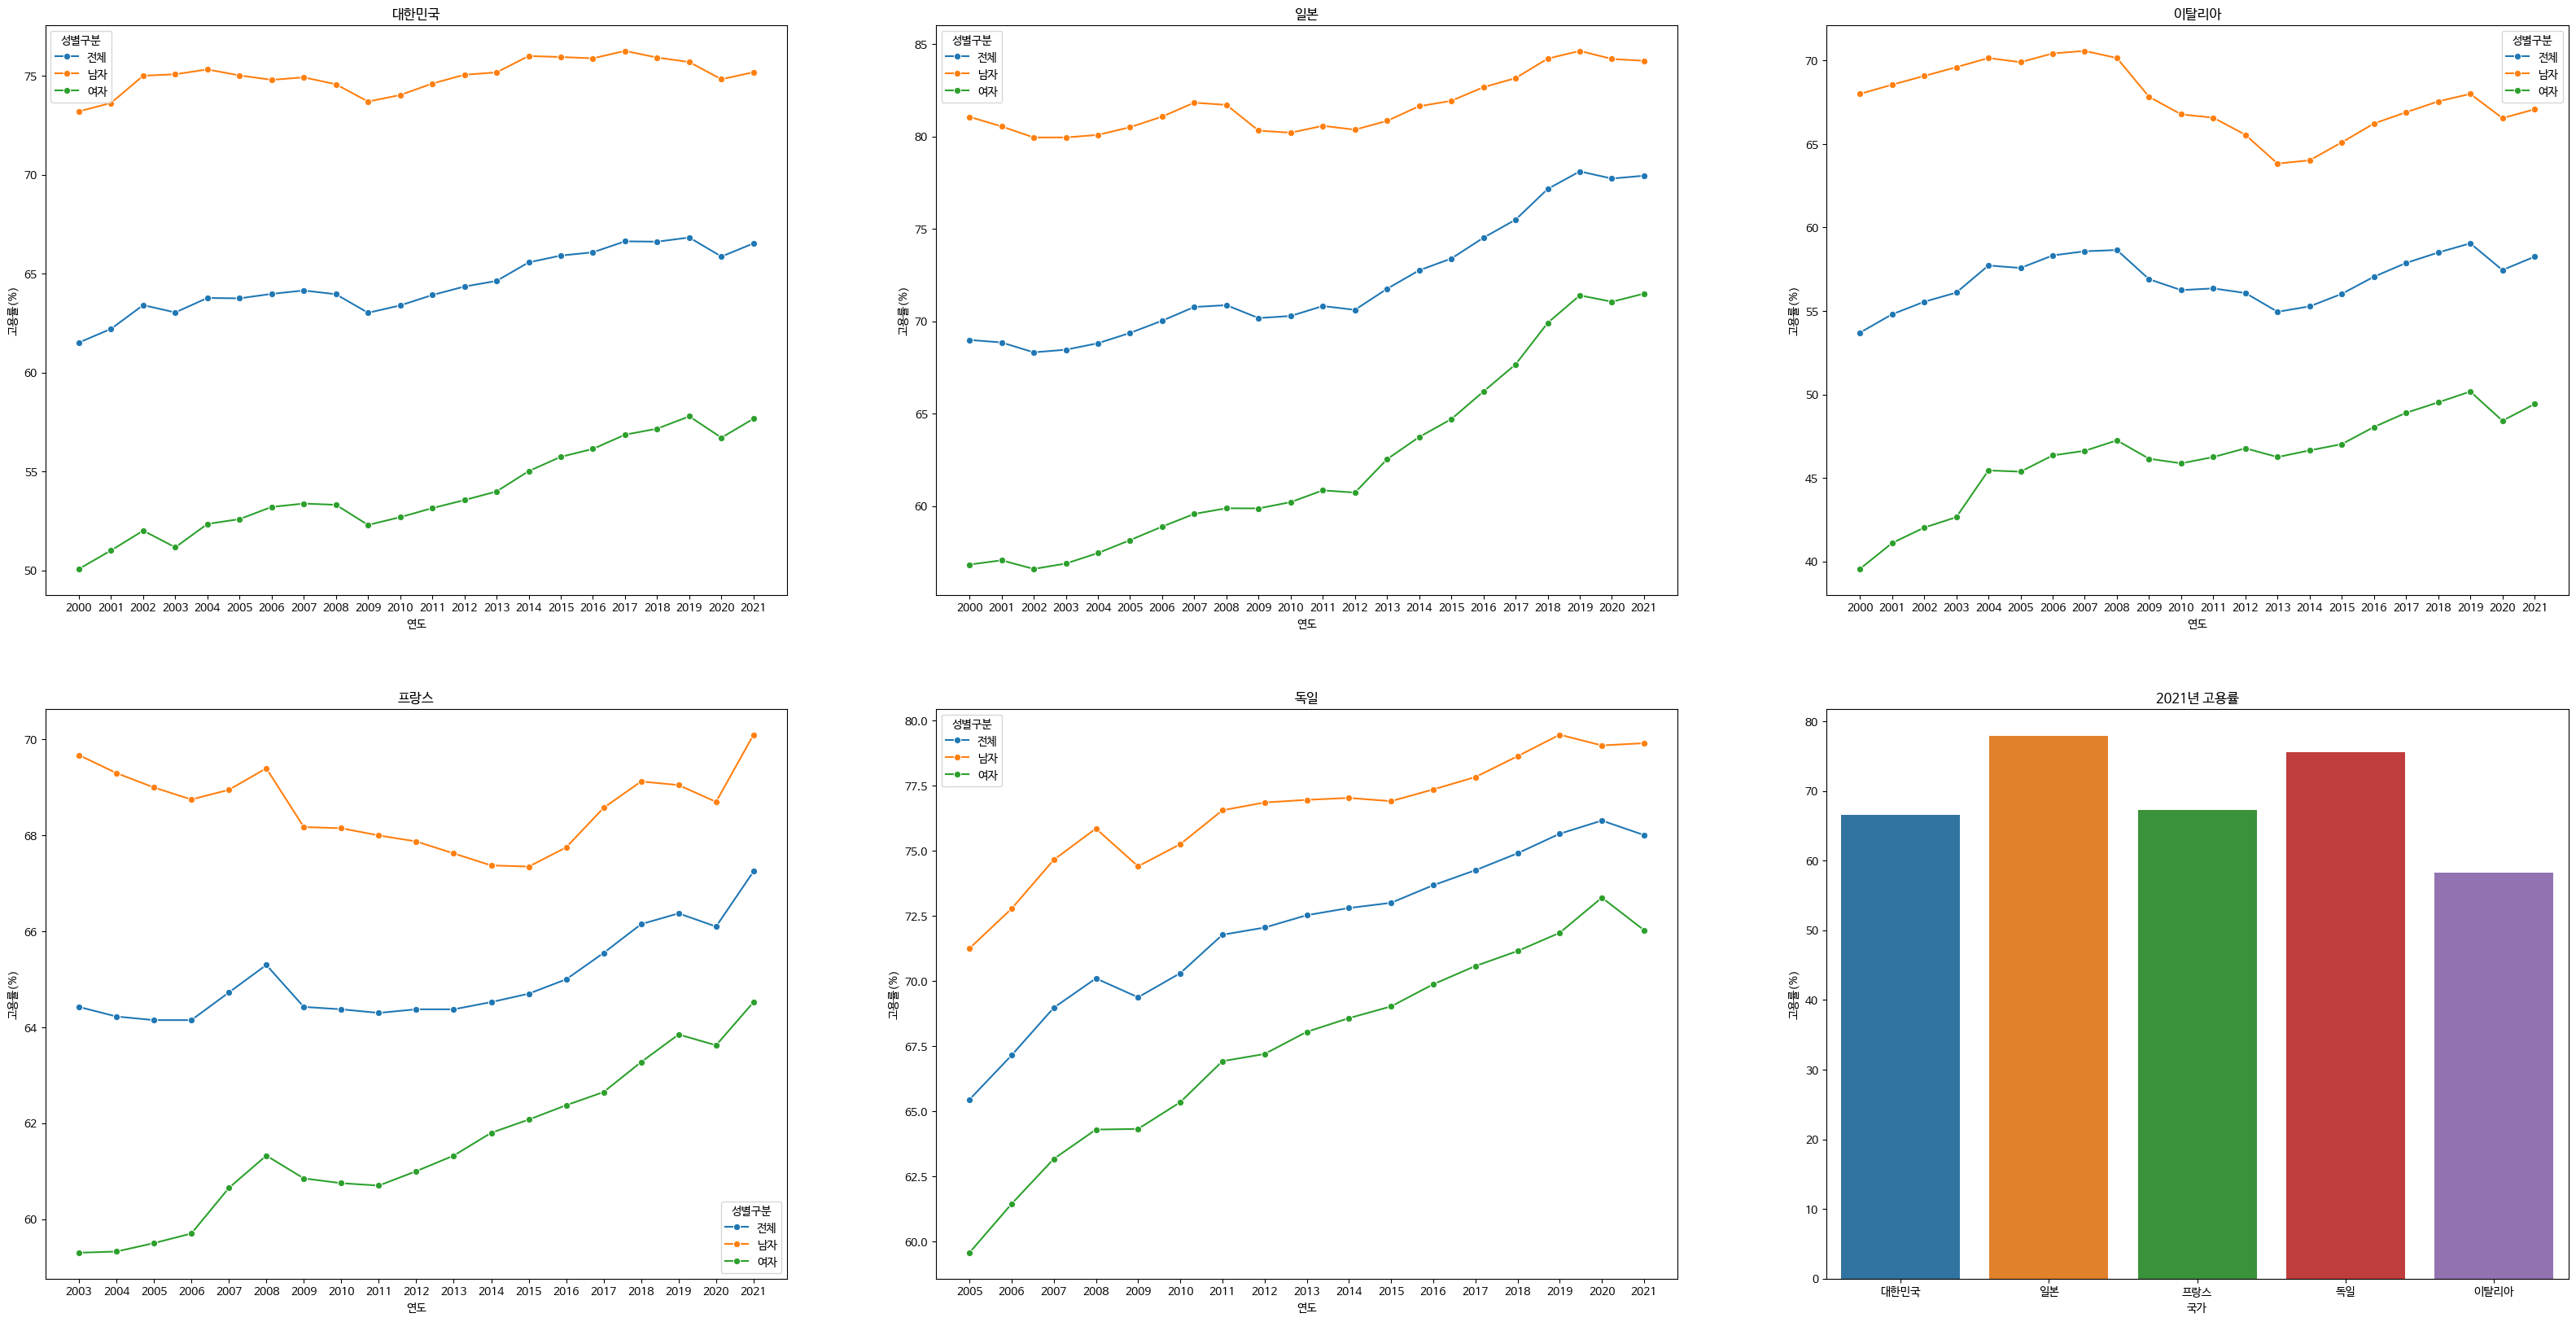

In [6]:
#고용률 비교

hired_sub_plot = plt.figure(figsize=(40, 20))

ax1=hired_sub_plot.add_subplot(2,3,1)
ax2=hired_sub_plot.add_subplot(2,3,2)
ax3=hired_sub_plot.add_subplot(2,3,3)
ax4=hired_sub_plot.add_subplot(2,3,4)
ax5=hired_sub_plot.add_subplot(2,3,5)
ax6=hired_sub_plot.add_subplot(2,3,6)

ax1.set_title('대한민국')
sns.lineplot(x='연도', y='고용률(%)', data=df_hired[(df_hired['국가'] == '대한민국')], marker='o', hue="성별구분", ax=ax1)

ax2.set_title('일본')
sns.lineplot(x='연도', y='고용률(%)', data=df_hired[(df_hired['국가'] == '일본')], marker='o', hue="성별구분", ax=ax2)

ax3.set_title('이탈리아')
sns.lineplot(x='연도', y='고용률(%)', data=df_hired[(df_hired['국가'] == '이탈리아')], marker='o', hue="성별구분", ax=ax3)

ax4.set_title('프랑스')
sns.lineplot(x='연도', y='고용률(%)', data=df_hired[(df_hired['국가'] == '프랑스')], marker='o', hue="성별구분", ax=ax4)

ax5.set_title('독일')
sns.lineplot(x='연도', y='고용률(%)', data=df_hired[(df_hired['국가'] == '독일')], marker='o', hue="성별구분", ax=ax5)

ax6.set_title('2021년 고용률')
sns.barplot(x='국가', y='고용률(%)', data=df_hired_total, hue='국가',ax=ax6)





In [7]:
#청년 실업률

params = {
    "method": "getList",
    "apiKey": "OWVmNjBiOTgzZjhiNzYyNjYwNjU0YWUxYTNkYTAzMWM=",
    "itmId": "T10+",
    "objL1": "00+",
    "objL2": "1005+1100+4075+4080+4120+",
    "format": "json",
    "jsonVD": "Y",
    "prdSe": "Y",
    "newEstPrdCnt": "26",
    "orgId": "101", #데이터 제공 조직 ID (통계청, 국제통계연감)
    "tblId": "DT_2KAA348", #조회 테이블 ID (연간 GDP)

}
df_unemploy=pd.DataFrame()

# API 요청 보내기
response = requests.get(url, params=params)

# 응답 데이터 확인 및 JSON 데이터 파싱
if response.status_code == 200:
    unemploy_data = response.json()

     # 단일 값(스칼라 값) 에러로인해 리스트로 저장 후 DF로 저장
    data_list = []
    for item in unemploy_data:
      data_list.append({
      "연도": item.get("PRD_DE"),
      "국가": item.get("C2_NM"),
      "청년 실업률(%)": item.get("DT")
    })
    df_unemploy = pd.DataFrame(data_list)

    #2000~ 2021까지의 데이터만 저장 (2029년도 까지 데이터 제공)
    df_unemploy = df_unemploy[df_unemploy['연도'].isin([str(year) for year in range(2000, 2022)])]

    # 컬럼이름 변경
    df_unemploy.columns = ['연도', '국가', '청년 실업률(%)']

else:
    print(f"Error: {response.status_code}")


Text(0.5, 1.0, '대한민국, 독일, 프랑스의 청년(15~24세) 실업률 추이')

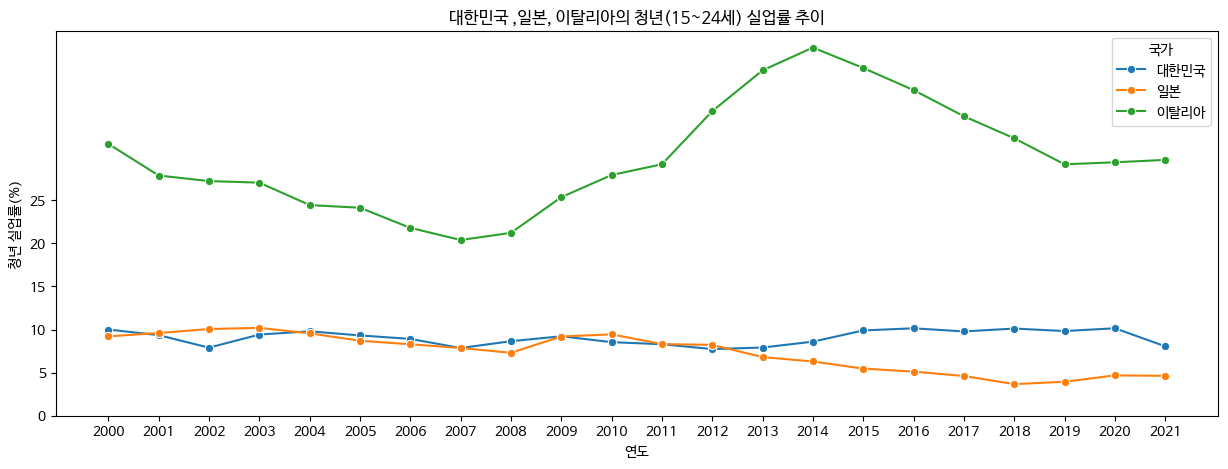

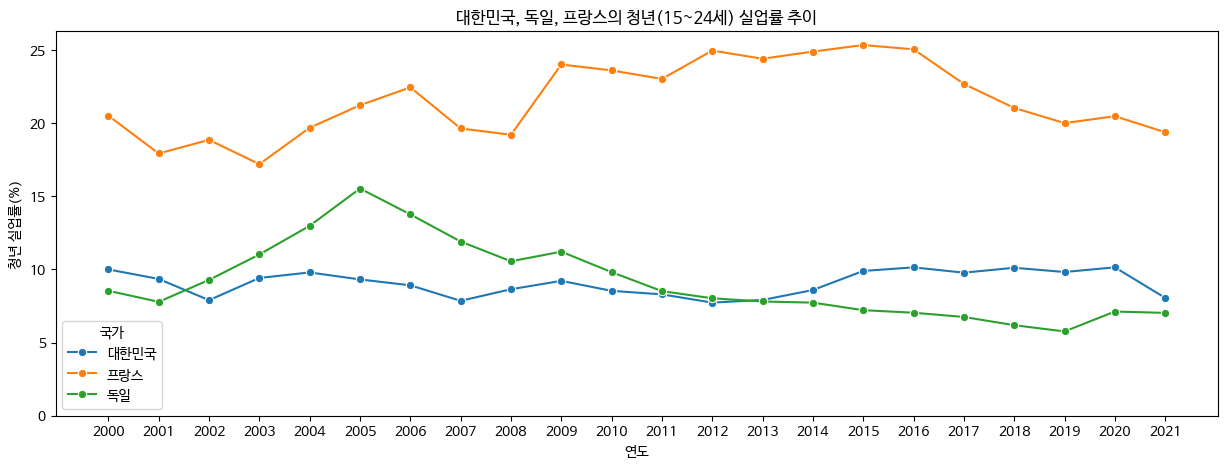

In [8]:
df_unemploy['청년 실업률(%)'] = pd.to_numeric(df_unemploy['청년 실업률(%)'])

df_low_unemploy = df_unemploy[df_unemploy['국가'].isin(['일본','이탈리아','대한민국'])]
df_high_unemploy = df_unemploy[df_unemploy['국가'].isin(['프랑스','독일','대한민국'])]

plt.figure(figsize=(15, 5))
sns.lineplot(x='연도', y='청년 실업률(%)', data=df_low_unemploy, marker='o', hue='국가')
plt.yticks(np.arange(0, 30, 5))
plt.title("대한민국 ,일본, 이탈리아의 청년(15~24세) 실업률 추이")

plt.figure(figsize=(15, 5))
sns.lineplot(x='연도', y='청년 실업률(%)', data=df_high_unemploy, marker='o', hue='국가')
plt.yticks(np.arange(0, 30, 5))
plt.title("대한민국, 독일, 프랑스의 청년(15~24세) 실업률 추이")


In [9]:
 #연간 GDP

params = {
    "apiKey": "OWVmNjBiOTgzZjhiNzYyNjYwNjU0YWUxYTNkYTAzMWM=",
    "itmId": "T2+",
    "objL1": "ALL",
    "format": "json",
    "jsonVD": "Y",
    "prdSe": "Y",
    "newEstPrdCnt": "10",
    "orgId": "101", #데이터 제공 조직 ID (통계청, IMF)
    "tblId": "DT_2WEO002", #조회 테이블 ID (연간 GDP)

}

# API 요청 보내기
response = requests.get(url, params=params)

# 응답 데이터 확인 및 JSON 데이터 파싱
if response.status_code == 200:
    GDP_data = response.json()


    df_All_GDP = pd.DataFrame(GDP_data)
    df_All_GDP = df_All_GDP[['PRD_DE', 'C1_NM', 'DT']]
    df_All_GDP = df_All_GDP[df_All_GDP['PRD_DE'] == "2023"]
    df_All_GDP.columns = ['연도', '국가', 'GDP($ Bilion)']

    #비교국가
    df_select_GDP= df_All_GDP[df_All_GDP['국가'].isin(['대한민국', '일본','프랑스','독일', '이탈리아'])]

    #상위 50개국만 데이터만 저장
    df_All_GDP['GDP($ Bilion)'] = df_All_GDP['GDP($ Bilion)'].astype(float)  #상위 50개 국가 필터링을 위해 데이터를 float로 변경
    df_All_GDP = df_All_GDP.sort_values(by="GDP($ Bilion)", ascending=False).head(50)
    df_All_GDP = df_All_GDP.sort_values(by="GDP($ Bilion)", ascending=True)

else:
    print(f"Error: {response.status_code}")


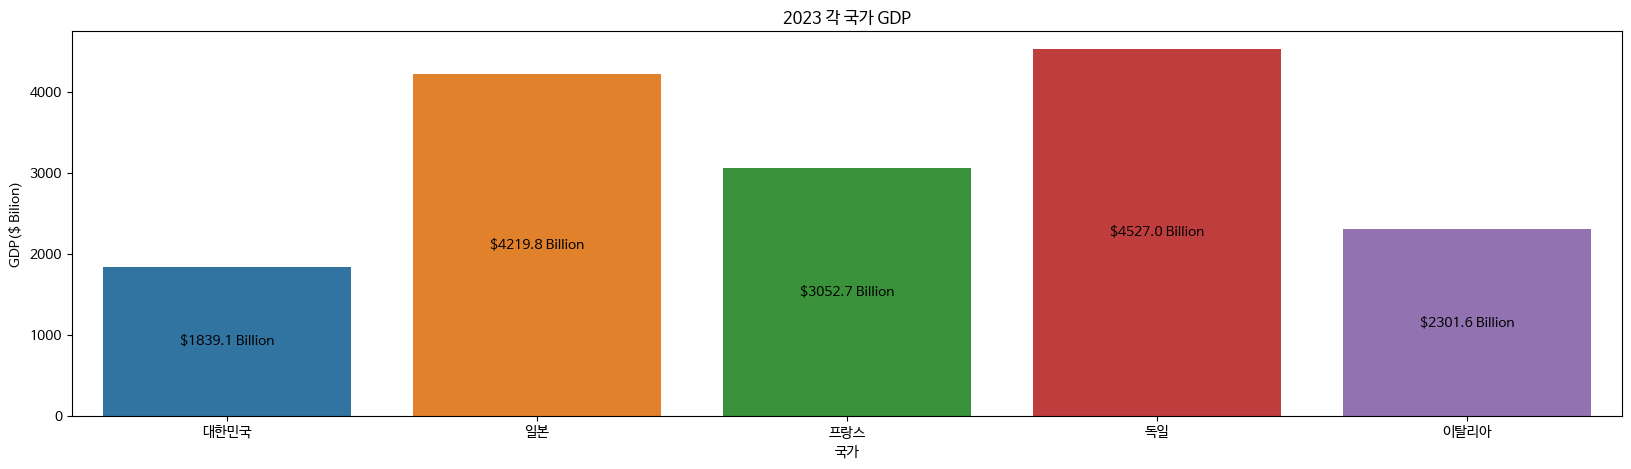

In [10]:
df_select_GDP['GDP($ Bilion)'] = pd.to_numeric(df_select_GDP['GDP($ Bilion)'])

plt.figure(figsize=(20, 5))
barplot=sns.barplot(x='국가', y='GDP($ Bilion)', data=df_select_GDP, hue='국가')
plt.title('2023 각 국가 GDP')

for bars in barplot.containers:
  barplot.bar_label(bars, fmt='$'+'%.1f'+' Billion',label_type='center')

<BarContainer object of 50 artists>

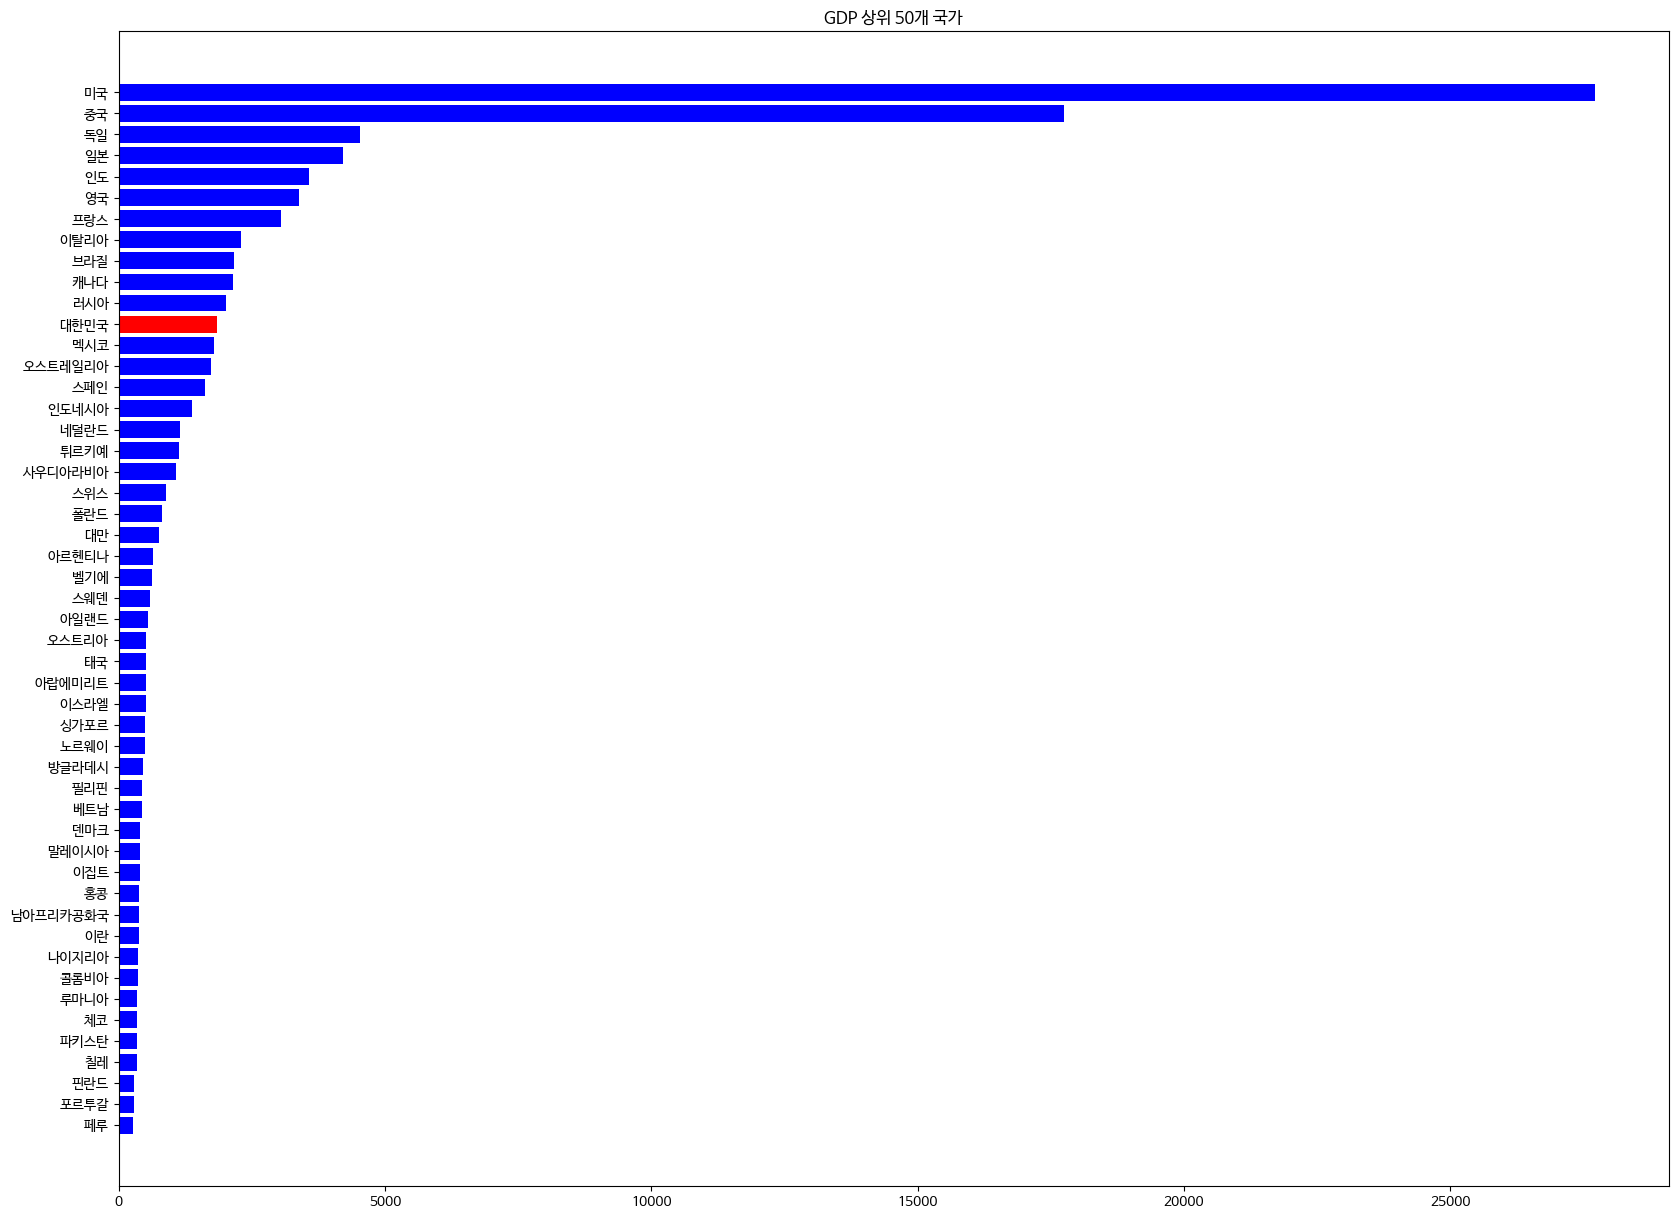

In [11]:
#세계12위 GDP순위
plt.figure(figsize=(20, 15))
df_All_GDP['GDP($ Bilion)'] = pd.to_numeric(df_All_GDP['GDP($ Bilion)'])

plt.title('GDP 상위 50개 국가')
plt.barh(
    df_All_GDP['국가'],
    df_All_GDP['GDP($ Bilion)'],
    color=['blue' if country != '대한민국' else 'red' for country in df_All_GDP['국가']]
)

In [12]:
#GDP(근무시간당 생산량)
params = {
    "apiKey": "OWVmNjBiOTgzZjhiNzYyNjYwNjU0YWUxYTNkYTAzMWM=",
    "itmId": "T001+",
    "objL1": "ALL",
    "format": "json",
    "jsonVD": "Y",
    "prdSe": "Y",
    "newEstPrdCnt": "3",
    "orgId": "101", #데이터 제공 조직 ID (통계청, 국제노동기구)
    "tblId": "DT_2ILOPRO003", #조회 테이블 ID (근무시간당 생산량)

}

# API 요청 보내기
response = requests.get(url, params=params)

# 응답 데이터 확인 및 JSON 데이터 파싱
if response.status_code == 200:
    workhour_gdp_data = response.json()

    data_list = []
    for item in workhour_gdp_data:
      data_list.append({
      "연도": item.get("PRD_DE"),
      "국가": item.get("C1_NM"),
      "근무시간당 생산량": item.get("DT")
    })

    df_workhour_gdp = pd.DataFrame(data_list)

    #원하는 데이터만 추출
    df_workhour_gdp = df_workhour_gdp[df_workhour_gdp['연도'] == "2023"]
    df_workhour_gdp = df_workhour_gdp[df_workhour_gdp['국가'].isin(['대한민국', '일본','프랑스','독일','이탈리아'])]
    df_workhour_gdp.columns = ['연도', '국가','근무시간당 생산량($)']

    #전체 데이터 중 2023년도 데이터
    df_All_workhour_gdp = pd.DataFrame(data_list)
    df_All_workhour_gdp = df_All_workhour_gdp[df_All_workhour_gdp['연도'] == "2023"]
    df_All_workhour_gdp.columns = ['연도', '국가', '근무시간당 생산량($)']

    #상위 50개국만 데이터만 저장
    df_All_workhour_gdp['근무시간당 생산량($)'] = df_All_workhour_gdp['근무시간당 생산량($)'].astype(float)
    df_All_workhour_gdp = df_All_workhour_gdp.sort_values(by="근무시간당 생산량($)", ascending=False).head(50)
    df_All_workhour_gdp = df_All_workhour_gdp.sort_values(by="근무시간당 생산량($)", ascending=True)

else:
    print(f"Error: {response.status_code}")


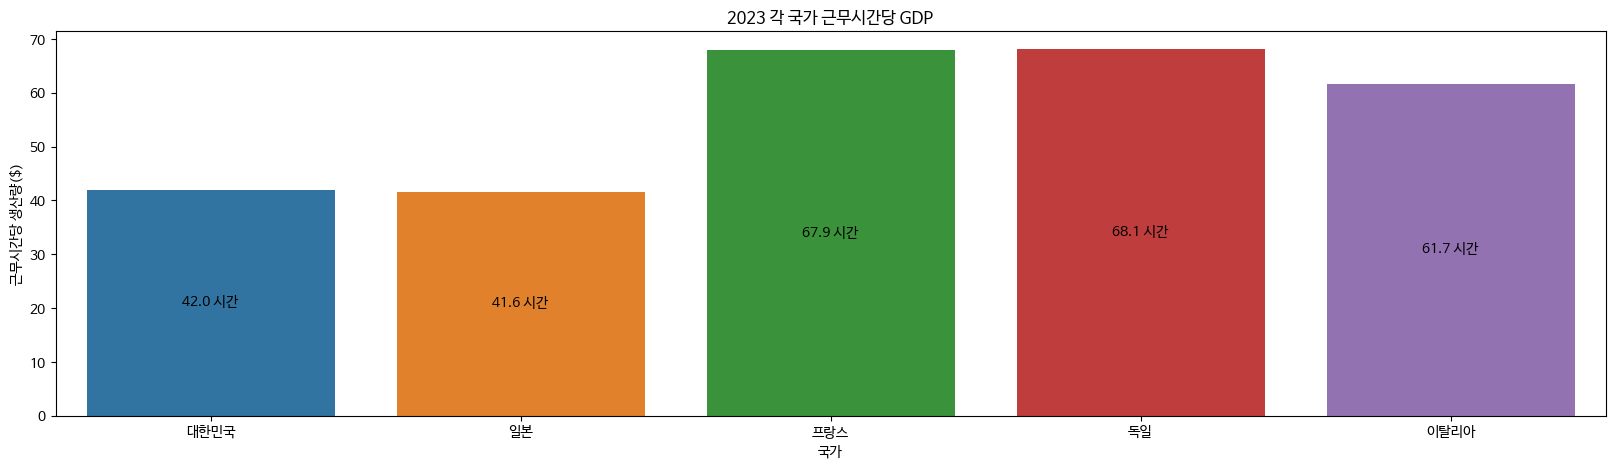

In [13]:
df_workhour_gdp['근무시간당 생산량($)'] = pd.to_numeric(df_workhour_gdp['근무시간당 생산량($)'])

plt.figure(figsize=(20, 5))
barplot=sns.barplot(x='국가', y='근무시간당 생산량($)', data=df_workhour_gdp, hue='국가')
plt.title('2023 각 국가 근무시간당 GDP')

for bars in barplot.containers:
  barplot.bar_label(bars, fmt='%.1f'+' 시간',label_type='center')

<BarContainer object of 50 artists>

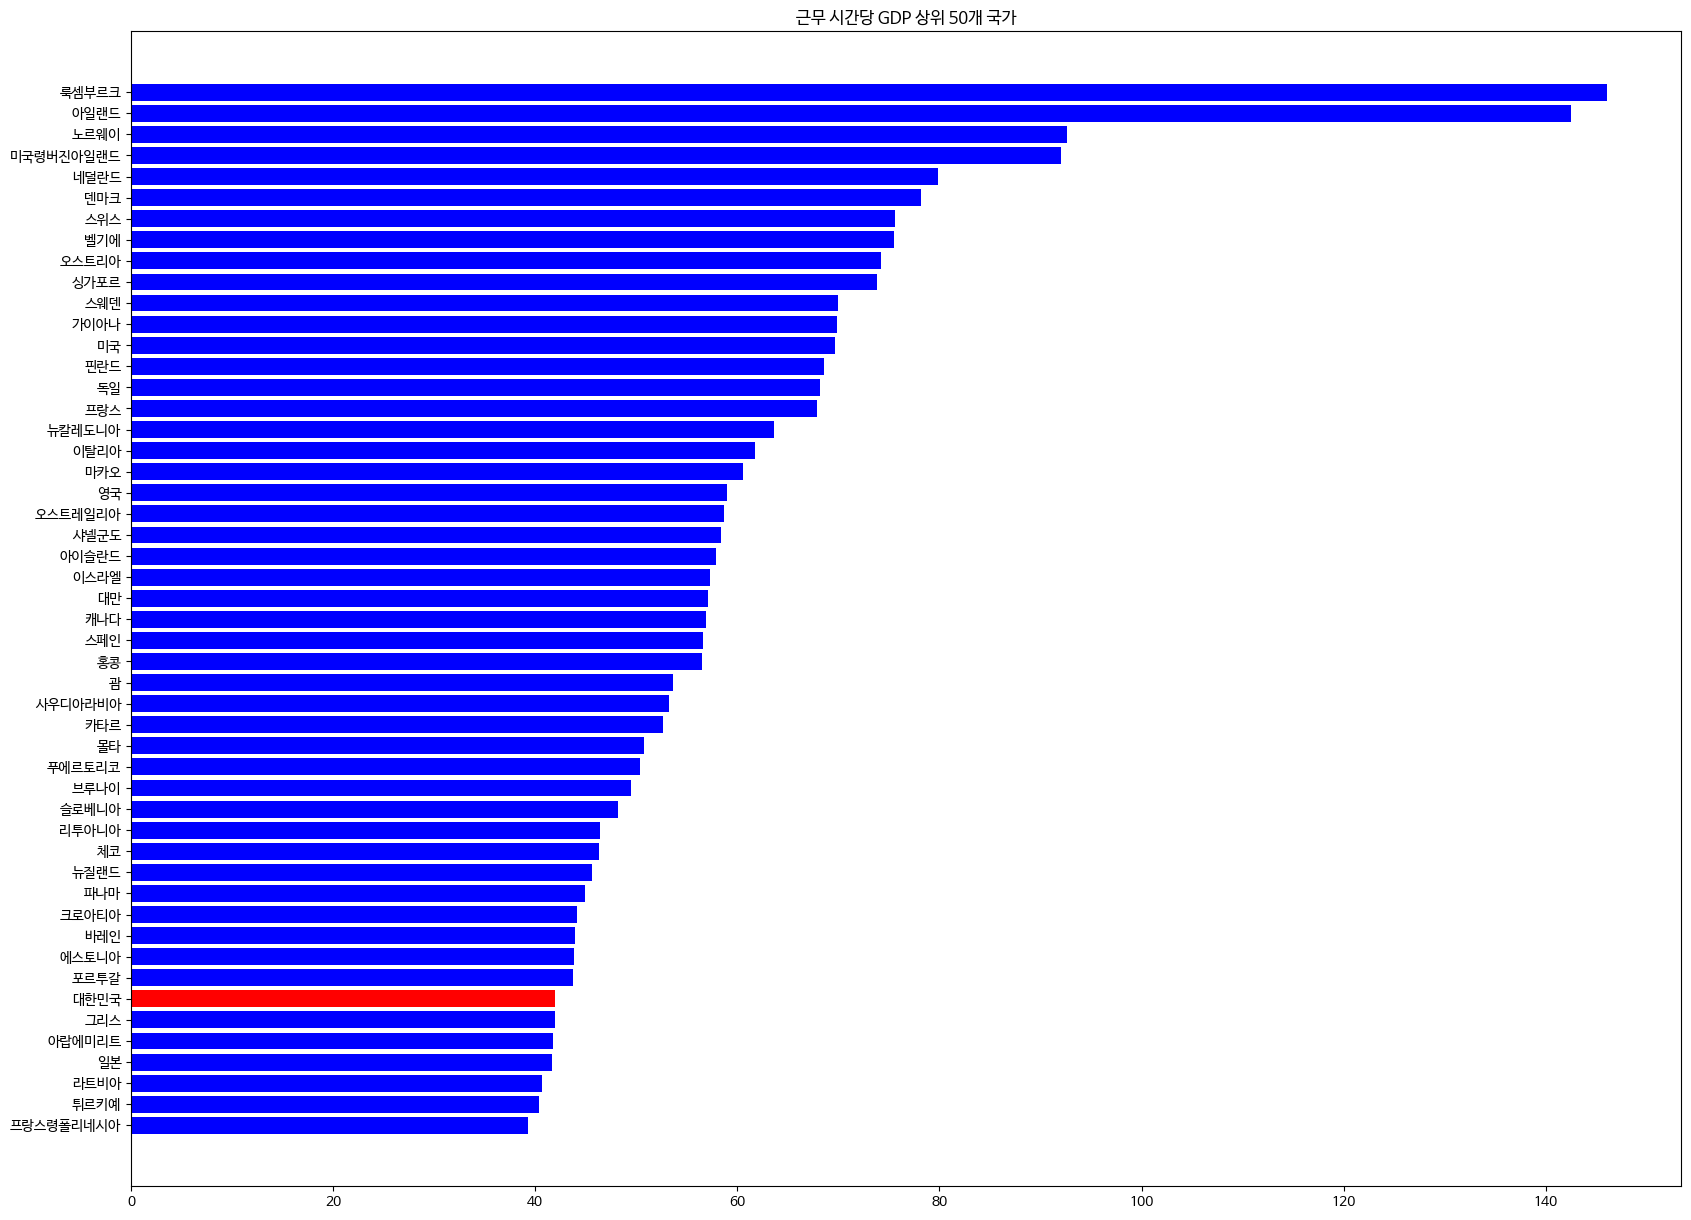

In [14]:
#시간당 GDP 44번째 위치한 대한민국
df_All_workhour_gdp['근무시간당 생산량($)'] = pd.to_numeric(df_All_workhour_gdp['근무시간당 생산량($)'])
plt.figure(figsize=(20, 15))

plt.title('근무 시간당 GDP 상위 50개 국가')
plt.barh(
    df_All_workhour_gdp['국가'],
    df_All_workhour_gdp['근무시간당 생산량($)'],
    color=['blue' if country != '대한민국' else 'red' for country in df_All_workhour_gdp['국가']]
)

In [15]:
df_worked_hour = pd.DataFrame()
df_worked_hour_day = pd.DataFrame()
df_2022_workhour = pd.DataFrame()

In [16]:
#근로자당 연 평균 실제 근로시간

params = {
    "apiKey": "OWVmNjBiOTgzZjhiNzYyNjYwNjU0YWUxYTNkYTAzMWM=",
    "itmId": "T2+", #연도별 전체 근로자 근로시간
    "objL1": "ALL",
    "format": "json",
    "jsonVD": "Y",
    "prdSe": "Y",
    "newEstPrdCnt": "30",
    "orgId": "101", #데이터 제공 조직 ID (통계청, OECD)
    "tblId": "DT_2BR20", #조회 테이블 ID (연간 근로시간)

}

# API 요청 보내기
response = requests.get(url, params=params)

# 응답 데이터 확인 및 JSON 데이터 파싱
if response.status_code == 200:
    worked_hour_data = response.json()

    #대한민국, 일본, 프랑스의 출산율 데이터만 DF로 저장
    df_worked_hour = pd.DataFrame(worked_hour_data)
    df_worked_hour = df_worked_hour[['PRD_DE', 'C1_NM', 'DT']]
    df_worked_hour= df_worked_hour[df_worked_hour['C1_NM'].isin(['대한민국', '일본','프랑스','독일','이탈리아'])]
    df_worked_hour = df_worked_hour[df_worked_hour['PRD_DE'].isin([str(year) for year in range(2008, 2023)])]#2008~ 2022까지의 데이터만 저장 (2029년도 까지 데이터 제공)

    df_worked_hour.columns = ['연도', '국가', '연 평균 근로시간']# 컬럼이름 변경

    #수치 데이터로 변환
    df_worked_hour['연 평균 근로시간'] = df_worked_hour['연 평균 근로시간'].astype(float).round()

    #전체 데이터 중 2022년도 데이터
    df_2022_workhour = pd.DataFrame(worked_hour_data)
    df_2022_workhour = df_2022_workhour[['PRD_DE', 'C1_NM', 'DT']]
    df_2022_workhour= df_2022_workhour[df_2022_workhour['PRD_DE'] == "2022"]
    df_2022_workhour.columns = ['연도', '국가', '연 평균 근로시간']

    #상위 50개국만 데이터만 저장
    df_2022_workhour['연 평균 근로시간'] = df_2022_workhour['연 평균 근로시간'].astype(float)  #상위 50개 국가 필터링을 위해 데이터를 float로 변경
    df_2022_workhour = df_2022_workhour.sort_values(by="연 평균 근로시간", ascending=False).head(50)
    df_2022_workhour = df_2022_workhour.sort_values(by="연 평균 근로시간", ascending=True)

else:
    print(f"Error: {response.status_code}")


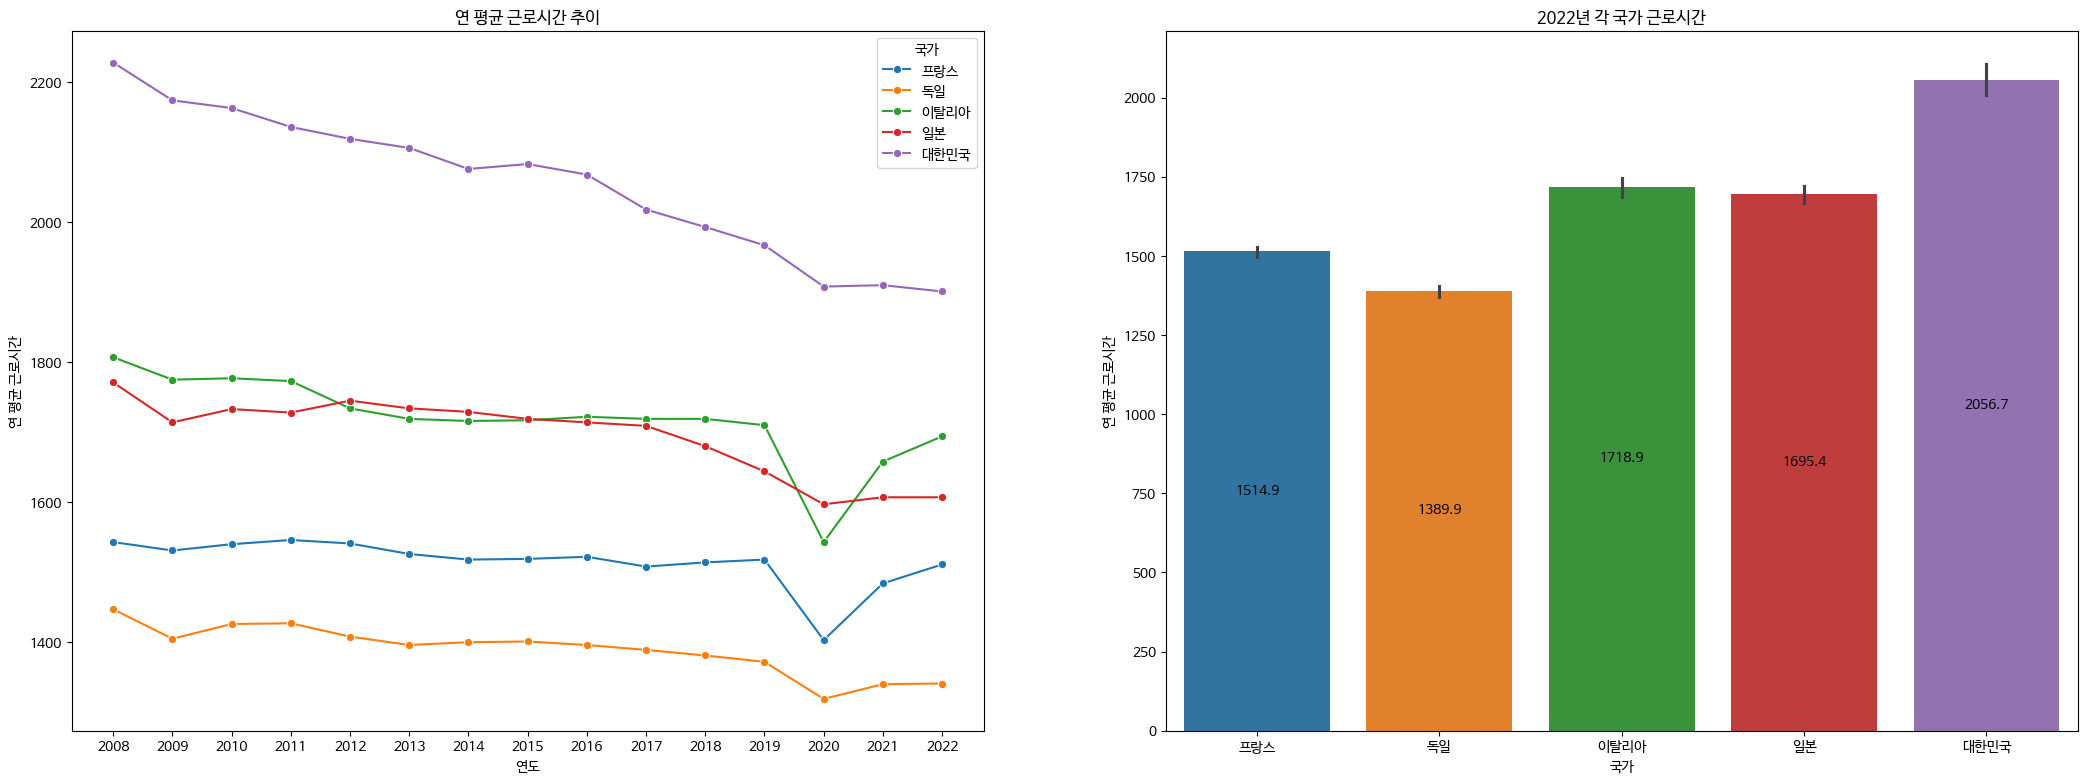

In [17]:
 df_worked_hour['연 평균 근로시간'] = pd.to_numeric(df_worked_hour['연 평균 근로시간'])

worked_hour_sub_plot = plt.figure(figsize=(40, 20))

ax1=worked_hour_sub_plot.add_subplot(2,3,1)
ax2=worked_hour_sub_plot.add_subplot(2,3,2)


df_worked_hour['연 평균 근로시간'] = pd.to_numeric(df_worked_hour['연 평균 근로시간'])

ax1.set_title('연 평균 근로시간 추이')
sns.lineplot(x='연도', y='연 평균 근로시간', data=df_worked_hour, hue='국가', marker='o' ,ax = ax1)

ax2.set_title('2022년 각 국가 근로시간')
barplot = sns.barplot(x='국가', y='연 평균 근로시간', data=df_worked_hour, hue='국가', ax = ax2)
for bars in barplot.containers:
  barplot.bar_label(bars, fmt='%.1f',label_type='center')


<BarContainer object of 36 artists>

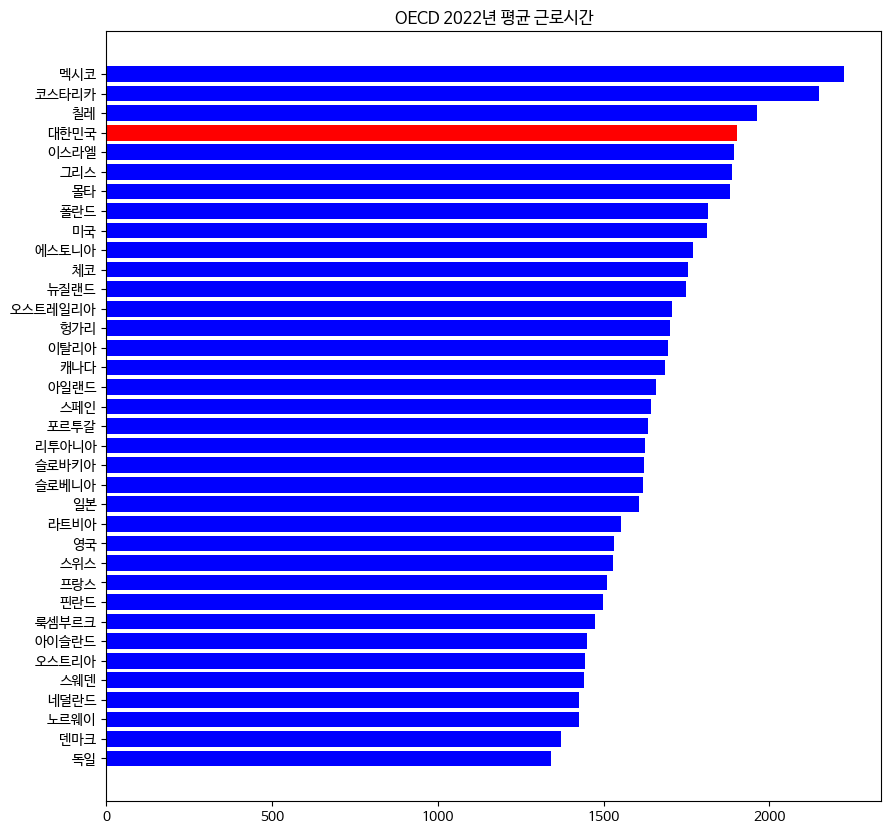

In [85]:
#OECD 2022 평균 근로시간

df_2022_workhour['연 평균 근로시간'] = pd.to_numeric(df_2022_workhour['연 평균 근로시간'])
plt.figure(figsize=(10, 10))

plt.title('OECD 2022년 평균 근로시간')
plt.barh(
    df_2022_workhour['국가'],
    df_2022_workhour['연 평균 근로시간'],
    color=['blue' if country != '대한민국' else 'red' for country in df_2022_workhour['국가']]
)

In [19]:
 #평균 혼인연령

params = {
    "apiKey": "OWVmNjBiOTgzZjhiNzYyNjYwNjU0YWUxYTNkYTAzMWM=",
    "itmId": "T1+",
    "objL1": "000",
    "objL2": "10+",
    "objL3": "ALL",
    "format": "json",
    "jsonVD": "Y",
    "prdSe": "Y",
    "newEstPrdCnt": "15",
    "orgId": "101", #데이터 제공 조직 ID (통계청, 신혼부부통계)
    "tblId": "DT_1NW1005", #조회 테이블 ID  (연간 GDP)

}

# API 요청 보내기
response = requests.get(url, params=params)

# 응답 데이터 확인 및 JSON 데이터 파싱
if response.status_code == 200:
    avg_age_data = response.json()

    df_avg_age = pd.DataFrame(avg_age_data)
    df_avg_age= df_avg_age[['PRD_DE', 'C3_NM', 'DT']]
    df_avg_age.columns = ['연도', '구분', '나이(세)']

else:
    print(f"Error: {response.status_code}")


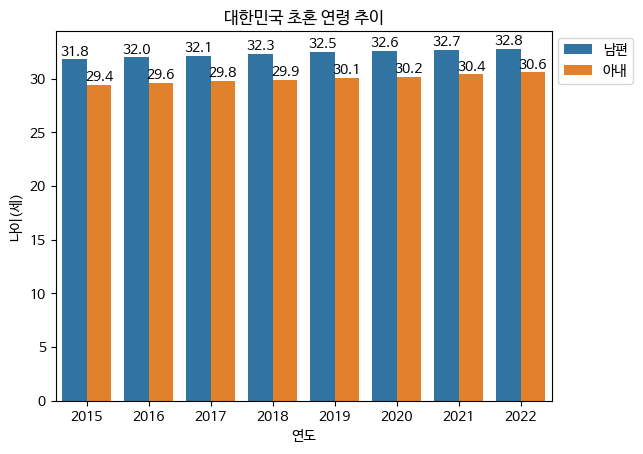

In [55]:
plt.title('대한민국 초혼 연령 추이')
barplot = sns.barplot(data=df_avg_age, x='연도', y='나이(세)', hue='구분')

for bars in barplot.containers:
  barplot.bar_label(bars, fmt='%.1f')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


In [79]:
#Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

file_path = '/content/drive/My Drive/3-2BigData/'

#Excel 파일 읽기
try:
    df_OECD_avg_age = pd.read_excel(file_path+'초혼나이.xlsx', engine='openpyxl', header=1, index_col=0) #index_col = 국가 이름을 인덱스로 지정
    df_OECD_avg_age = df_OECD_avg_age.loc[:, [2019, '2019.1']] #.xlsx의 파일을 불러오면서 header=1 옵셥으로 인해 같은 연도 구분을 위해 여성의 데이터 쪽의 연도는 '.1'이 붙으면서 문자 취급을 받는 것 같다.
    df_OECD_avg_age.columns = ['OECD 남성평균 초혼연령', 'OECD 여성평균 초혼연령']
    df_OECD_avg_age['전체 평균 초혼연령'] = df_OECD_avg_age[['OECD 남성평균 초혼연령', 'OECD 여성평균 초혼연령']].mean(axis=1)
    df_OECD_avg_age = df_OECD_avg_age.sort_values(by='전체 평균 초혼연령', ascending=True)

except Exception as e:
    print("파일을 읽는 중 오류 발생:", e)


Mounted at /content/drive


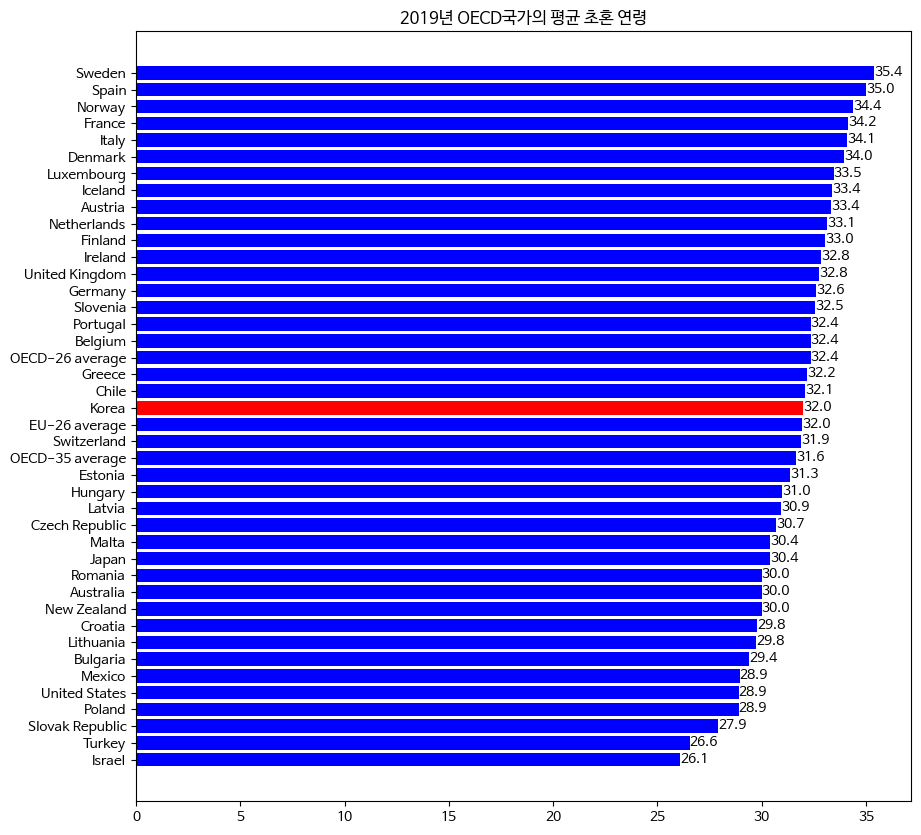

In [81]:
plt.figure(figsize=(10, 10))
plt.title('2019년 OECD국가의 평균 초혼 연령')

barplot = plt.barh(
    df_OECD_avg_age.index,
    df_OECD_avg_age['전체 평균 초혼연령'],
    color=['blue' if country != 'Korea' else 'red' for country in df_OECD_avg_age.index]
)

# 각 바 끝부분에 값을 표시
for rect in barplot:
    width = rect.get_width()
    plt.text(
        width, rect.get_y() + rect.get_height() / 2,
        f'{width:.1f}',
        va='center', ha='left', color='black', fontsize=10
    )


In [21]:
#연차별 신혼 부부 수
params = {
    "apiKey": "OWVmNjBiOTgzZjhiNzYyNjYwNjU0YWUxYTNkYTAzMWM=",
    "itmId": "T10+",
    "objL1": "101+102+103+104+105+",
    "objL2": "00+",
    "format": "json",
    "jsonVD": "Y",
    "prdSe": "Y",
    "newEstPrdCnt": "15",
    "orgId": "101", #데이터 제공 조직 ID (통계청, 신혼부부통계)
    "tblId": "DT_1NW1003",

}

# API 요청 보내기
response = requests.get(url, params=params)

# 응답 데이터 확인 및 JSON 데이터 파싱
if response.status_code == 200:
    num_newlywed_data = response.json()

    #print(json.dumps(num_newlywed_data, indent=4, ensure_ascii=False))


    df_num_newlywed = pd.DataFrame(num_newlywed_data)
    df_num_newlywed= df_num_newlywed[['PRD_DE', 'C1_NM', 'DT']]
    df_num_newlywed.columns = ['연도', '연차', '합계(쌍)']

else:
    print(f"Error: {response.status_code}")


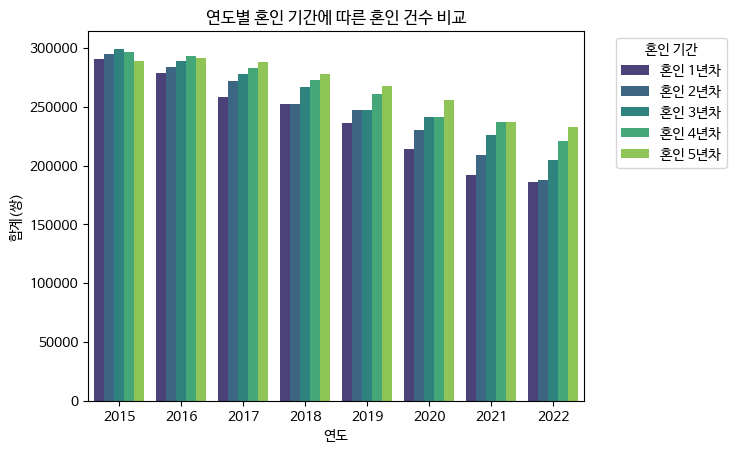

In [22]:
df_num_newlywed['합계(쌍)'] = pd.to_numeric(df_num_newlywed['합계(쌍)'])


# 군집형 막대 그래프
sns.barplot(data=df_num_newlywed, x='연도', y='합계(쌍)', hue='연차', palette='viridis')

plt.title('연도별 혼인 기간에 따른 혼인 건수 비교')

# 범례 위치 조정
plt.legend(title='혼인 기간', bbox_to_anchor=(1.05, 1), loc='upper left')


In [23]:
#조혼인율(인구 1000명당 혼인건수)
params = {
    "apiKey": "OWVmNjBiOTgzZjhiNzYyNjYwNjU0YWUxYTNkYTAzMWM=",
    "itmId": "T1+",
    "objL1": "42+",
    "format": "json",
    "jsonVD": "Y",
    "prdSe": "Y",
    "newEstPrdCnt": "23",
    "orgId": "101", #데이터 제공 조직 ID (통계청, 인구동향조사)
    "tblId": "INH_1B8000F_03",

}

# API 요청 보내기
response = requests.get(url, params=params)

# 응답 데이터 확인 및 JSON 데이터 파싱
if response.status_code == 200:
    num_newlywed_rate_data = response.json()

    df_num_newlywed_rate = pd.DataFrame(num_newlywed_rate_data)
    df_num_newlywed_rate = df_num_newlywed_rate[['PRD_DE', 'C1_NM', 'DT']]
    df_num_newlywed_rate.columns = ['연도', '연차', '조혼인율(%)']

else:
    print(f"Error: {response.status_code}")


Text(0.5, 1.0, '2000년대의 조혼인율 추이')

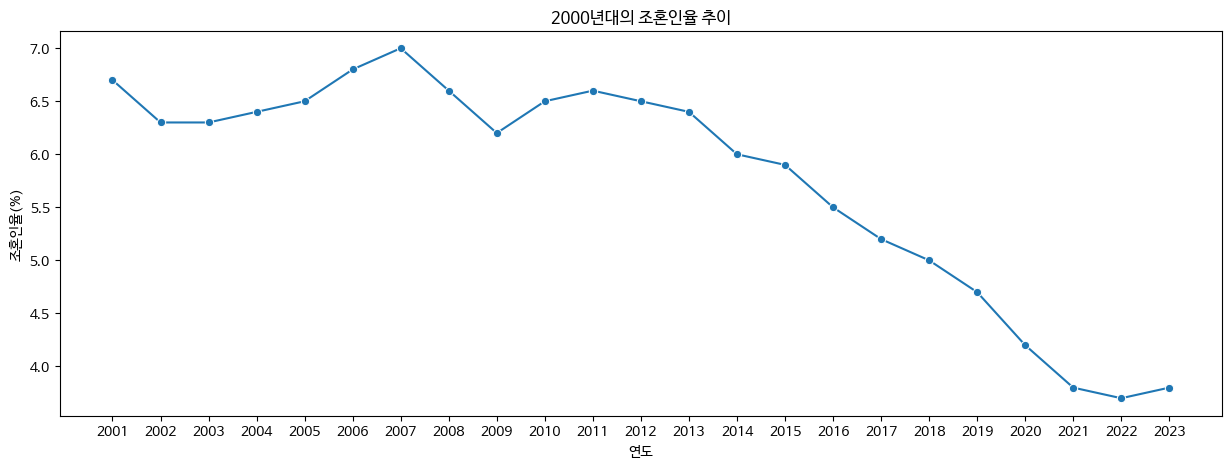

In [56]:
df_num_newlywed_rate['조혼인율(%)'] = pd.to_numeric(df_num_newlywed_rate['조혼인율(%)'])


plt.figure(figsize=(15, 5))
sns.lineplot(x='연도', y='조혼인율(%)', data=df_num_newlywed_rate, marker='o')
plt.title('2000년대의 대한민국의 조혼인율 추이')

In [86]:
#OECD 조혼인율
try:
    df_OECD_marriage_rate = pd.read_excel(file_path+'조혼인율.xlsx', engine='openpyxl', header=0, index_col=0) #index_col = 국가 이름을 인덱스로 지정
    df_OECD_marriage_rate = df_OECD_marriage_rate.loc[:, 2019].dropna() # 결측치데이터는  삭제
    df_OECD_marriage_rate = pd.DataFrame(df_OECD_marriage_rate) #DF
    df_OECD_marriage_rate.columns = ['2020년 OECD 국가 조혼인율(%)']
    df_OECD_marriage_rate = df_OECD_marriage_rate.sort_values(by='2020년 OECD 국가 조혼인율(%)', ascending=True)

except Exception as e:
    print("파일을 읽는 중 오류 발생:", e)

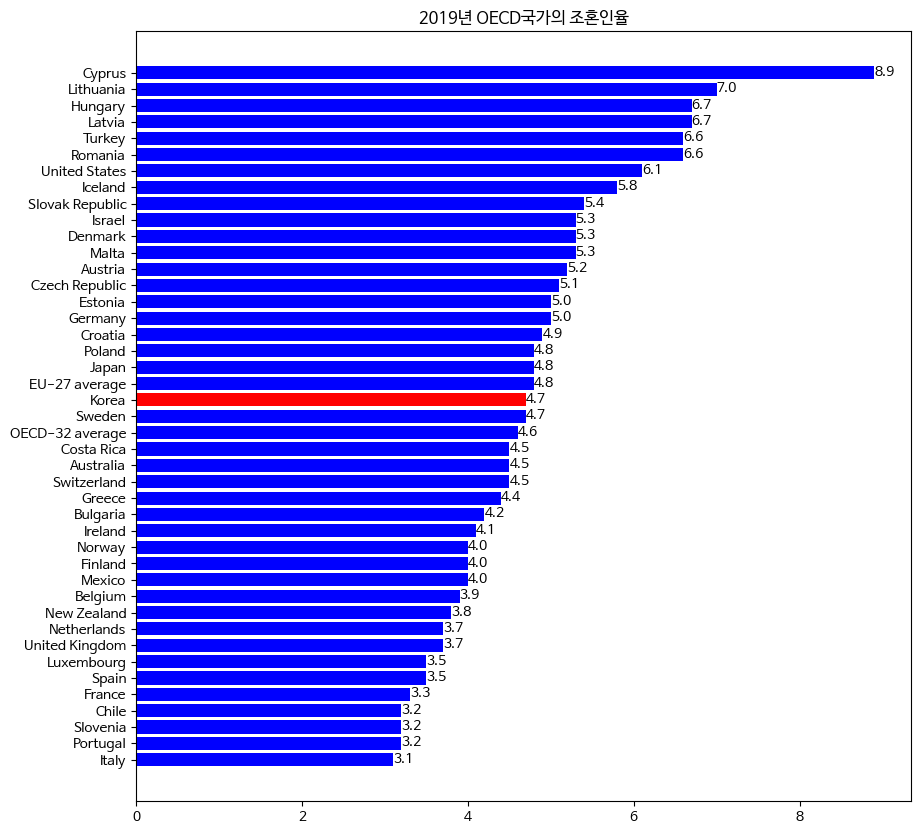

In [87]:
plt.figure(figsize=(10, 10))
plt.title('2019년 OECD국가의 조혼인율')#천만명당 결혼하는 사람의 비율

barplot = plt.barh(
    df_OECD_marriage_rate.index,
    df_OECD_marriage_rate['2020년 OECD 국가 조혼인율(%)'],
    color=['blue' if country != 'Korea' else 'red' for country in df_OECD_marriage_rate.index]
)

# 각 바 끝부분에 값을 표시
for rect in barplot:
    width = rect.get_width()
    plt.text(
        width, rect.get_y() + rect.get_height() / 2,
        f'{width:.1f}',
        va='center', ha='left', color='black', fontsize=10
    )


In [25]:
#미혼남녀(19~49세)결혼인식(필요성)
params = {
    "apiKey": "OWVmNjBiOTgzZjhiNzYyNjYwNjU0YWUxYTNkYTAzMWM=",
    "itmId": "T001",
    "objL1": "A01+",
    "objL2": "B01+B02+B03+B04+",
    "format": "json",
    "jsonVD": "Y",
    "prdSe": "Y",
    "newEstPrdCnt": "3",
    "orgId": "331", #데이터 제공 조직 ID (통계청, 한국보건 사회 연구원)
    "tblId": "DT_331001_2021CG012",

}

# API 요청 보내기
response = requests.get(url, params=params)

# 응답 데이터 확인 및 JSON 데이터 파싱
if response.status_code == 200:
    merry_recog_data = response.json()

    data_list = []
    for item in merry_recog_data:
      data_list.append({
      "연도": item.get("PRD_DE"),
      "응답": item.get("C2_NM"),
      "응답률(%)": item.get("DT")

    })

    df_merry_recog = pd.DataFrame(merry_recog_data)
    df_merry_recog = df_merry_recog[['PRD_DE', 'C2_NM', 'DT']]
    df_merry_recog.columns = ['연도', '응답', '응답률(%)']


else:
    print(f"Error: {response.status_code}")


In [26]:
#기혼과 미혼의 행복 정도
params = {
    "apiKey": "OWVmNjBiOTgzZjhiNzYyNjYwNjU0YWUxYTNkYTAzMWM=",
    "itmId": "T001",
    "objL1": "A01+",
    "objL2": "B01+B02+B03+B04+",
    "format": "json",
    "jsonVD": "Y",
    "prdSe": "Y",
    "newEstPrdCnt": "3",
    "orgId": "331", #데이터 제공 조직 ID (통계청, 한국보건 사회 연구원)
    "tblId": "DT_331001_2021CG013",
}
# API 요청 보내기
response = requests.get(url, params=params)

# 응답 데이터 확인 및 JSON 데이터 파싱
if response.status_code == 200:
    merry_satisfy_data = response.json()

    data_list = []
    for item in merry_recog_data:
      data_list.append({
      "연도": item.get("PRD_DE"),
      "응답": item.get("C2_NM"),
      "응답률(%)": item.get("DT")

    })

    df_merry_satisfy = pd.DataFrame(merry_satisfy_data)
    df_merry_satisfy = df_merry_satisfy[['PRD_DE','C2_NM', 'DT']]
    df_merry_satisfy.columns = ['연도', '응답', '응답률(%)']

else:
    print(f"Error: {response.status_code}")


([<matplotlib.patches.Wedge at 0x79254141f550>,
 [Text(-0.5629173114515006, 0.945052432655572, '전혀 동의 안 함'),
  Text(-0.5981365262164293, -0.9231645010537086, '별로 동의 안 함'),
  Text(1.0553537281010803, 0.3102072026616263, '약간 동의함'),
  Text(0.18912206002071744, 1.0836202500938787, '매우 동의함')],
 [Text(-0.307045806246273, 0.5154831450848575, '17.1%'),
  Text(-0.32625628702714327, -0.5035442733020229, '47.5%'),
  Text(0.5756474880551347, 0.16920392872452342, '29.9%'),
  Text(0.10315748728402768, 0.5910655909602974, '5.5%')])

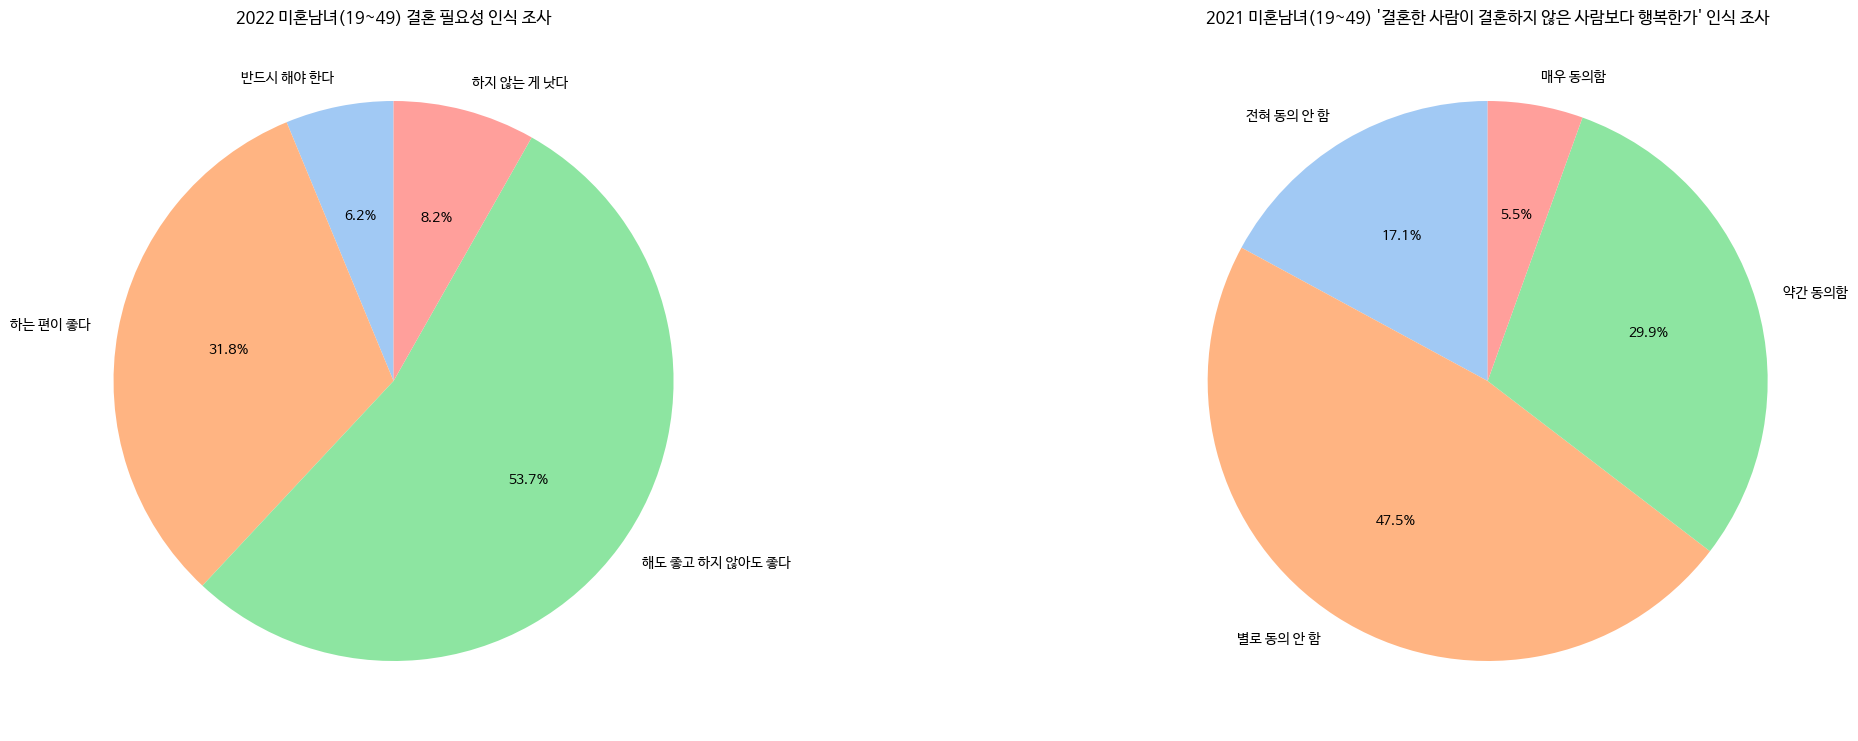

In [27]:
df_merry_recog['응답률(%)'] = pd.to_numeric(df_merry_recog['응답률(%)'])
df_merry_satisfy['응답률(%)'] = pd.to_numeric(df_merry_satisfy['응답률(%)'])


worked_hour_sub_plot = plt.figure(figsize=(40, 20))

ax1=worked_hour_sub_plot.add_subplot(2,3,1)
ax2=worked_hour_sub_plot.add_subplot(2,3,2)


ax1.set_title('2022 미혼남녀(19~49) 결혼 필요성 인식 조사')
ax1.pie(
    df_merry_recog["응답률(%)"],
    labels=df_merry_recog["응답"],
    autopct="%.1f%%",
    colors=sns.color_palette("pastel"),
    startangle=90
)

ax2.set_title("2021 미혼남녀(19~49) '결혼한 사람이 결혼하지 않은 사람보다 행복한가' 인식 조사")
ax2.pie(
    df_merry_satisfy["응답률(%)"],
    labels=df_merry_satisfy["응답"],
    autopct="%.1f%%",
    colors=sns.color_palette("pastel"),
    startangle=90
)



In [89]:
#OECD 평균 출산나이
try:
    df_OECD_childbirth_age = pd.read_excel(file_path+'출산나이.xlsx', engine='openpyxl', header=0, index_col=0) #index_col = 국가 이름을 인덱스로 지정
    df_OECD_childbirth_age = df_OECD_childbirth_age.loc[:, 2020]
    df_OECD_childbirth_age = pd.DataFrame(df_OECD_childbirth_age) #DF
    df_OECD_childbirth_age.columns = ['나이']
    df_OECD_childbirth_age = df_OECD_childbirth_age.sort_values(by='나이', ascending=True)

except Exception as e:
    print("파일을 읽는 중 오류 발생:", e)

In [90]:
#OECD 평균 첫째의 출산나이
try:
    df_OECD_first_childbirth_age = pd.read_excel(file_path+'첫째 출산나이.xlsx', engine='openpyxl', header=0, index_col=0) #index_col = 국가 이름을 인덱스로 지정
    df_OECD_first_childbirth_age = df_OECD_first_childbirth_age.loc[:, 2020]
    df_OECD_first_childbirth_age = pd.DataFrame(df_OECD_first_childbirth_age) #DF
    df_OECD_first_childbirth_age.columns = ['나이']
    df_OECD_first_childbirth_age = df_OECD_first_childbirth_age.sort_values(by='나이', ascending=True)

except Exception as e:
    print("파일을 읽는 중 오류 발생:", e)

<ipython-input-93-220d092b0e32>:45: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  plt.tight_layout()  # 서브플롯 간 겹치지 않도록 레이아웃 조정


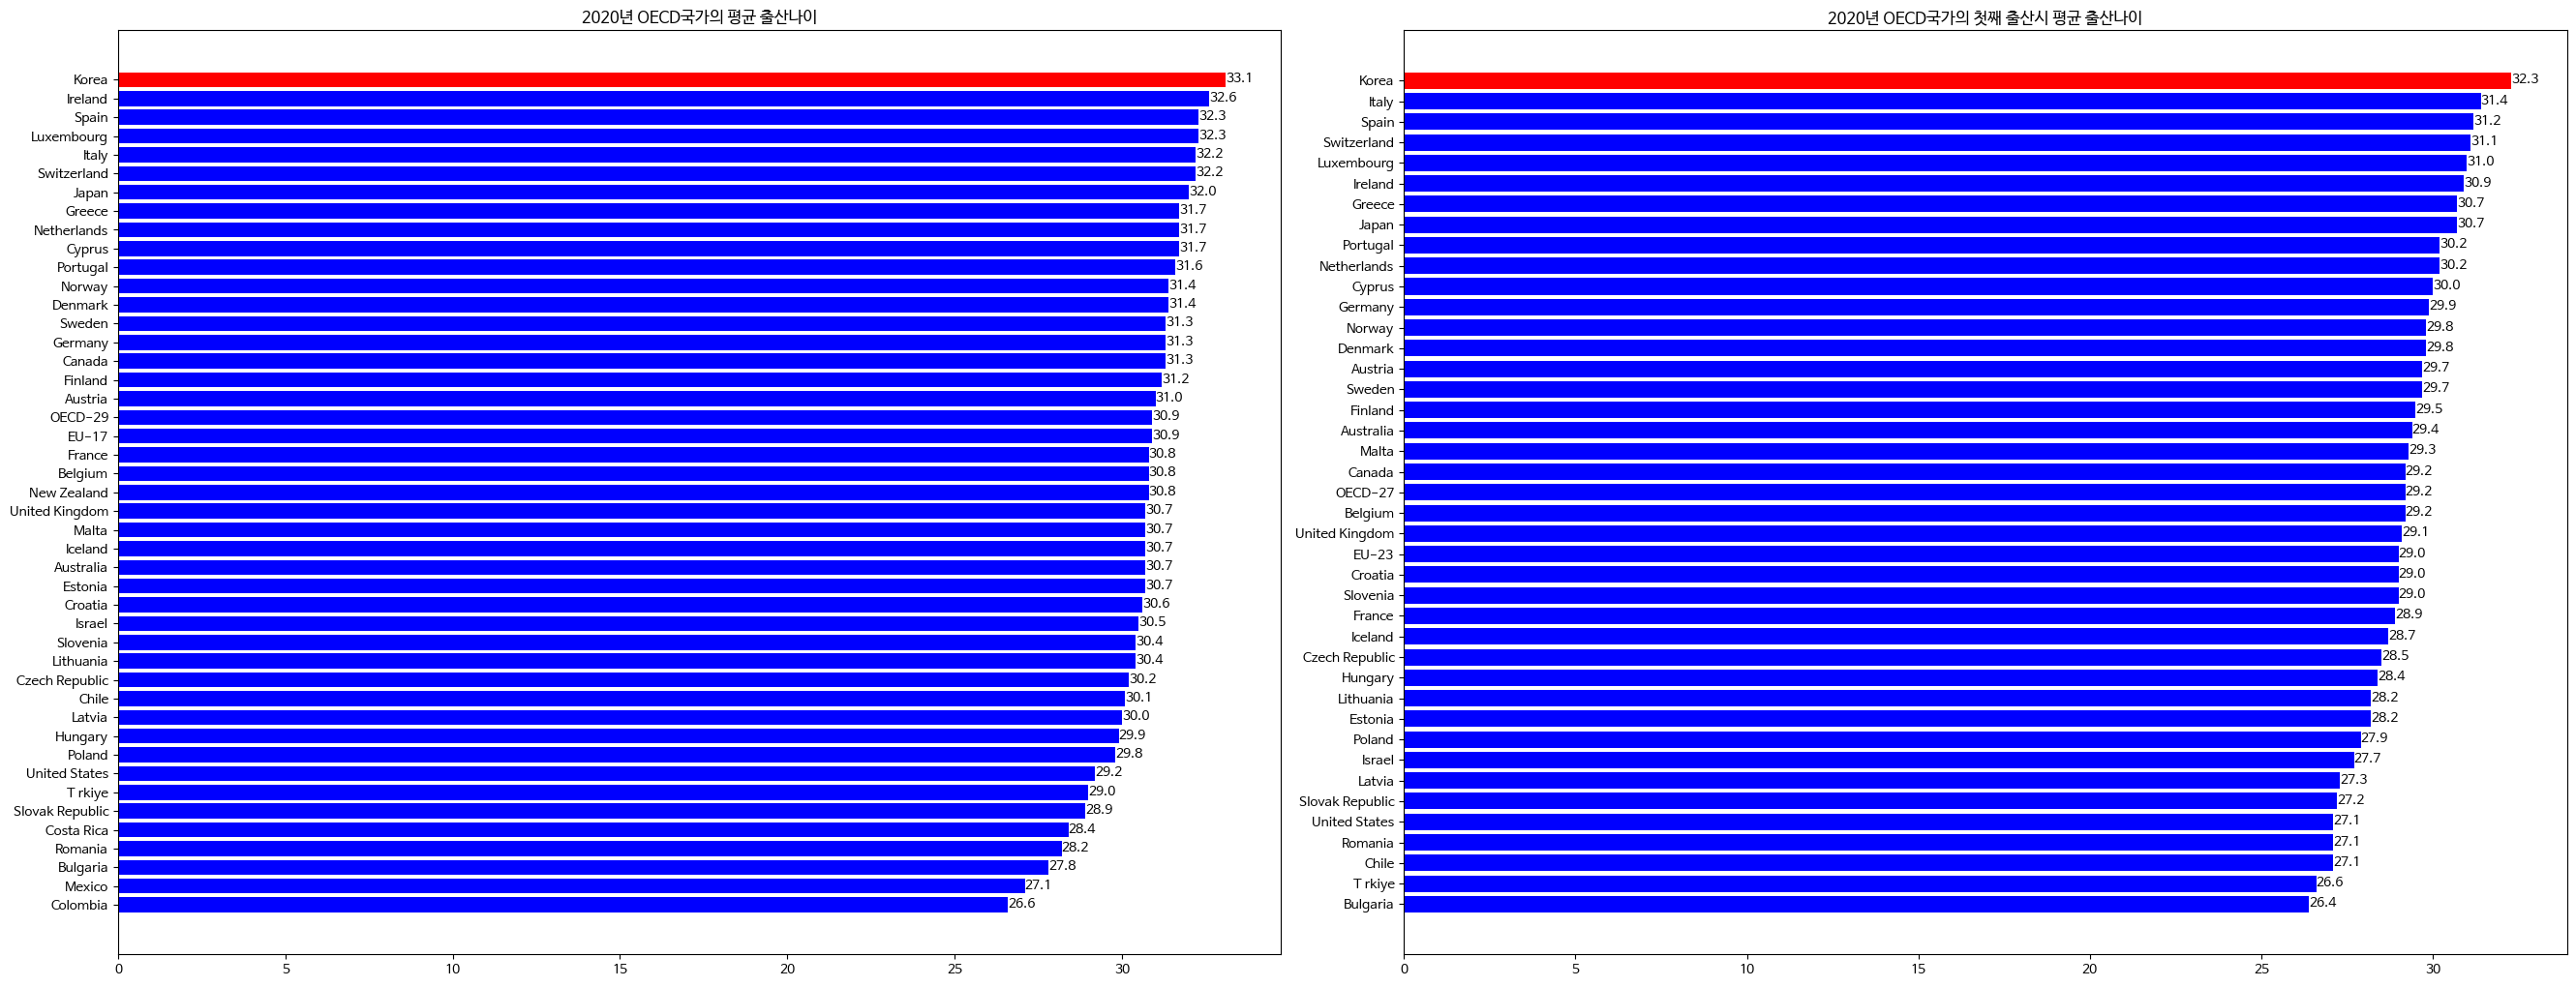

In [93]:
# 산모 출산나이 그래프 그리기
childbirth_age_sub_plot = plt.figure(figsize=(40, 20))


ax1 = childbirth_age_sub_plot.add_subplot(2, 3, 1)
ax1.set_title('2020년 OECD국가의 평균 출산나이')


barplot1 = ax1.barh(
    df_OECD_childbirth_age.index,
    df_OECD_childbirth_age['나이'],
    color=['blue' if country != 'Korea' else 'red' for country in df_OECD_childbirth_age.index]
)


for rect in barplot1:
    width = rect.get_width()
    ax1.text(
        width, rect.get_y() + rect.get_height() / 2,
        f'{width:.1f}',
        va='center', ha='left', color='black', fontsize=10
    )

ax2 = childbirth_age_sub_plot.add_subplot(2, 3, 2)
ax2.set_title('2020년 OECD국가의 첫째 출산시 평균 출산나이')


barplot2 = ax2.barh(
    df_OECD_first_childbirth_age.index,
    df_OECD_first_childbirth_age['나이'],
    color=['blue' if country != 'Korea' else 'red' for country in df_OECD_first_childbirth_age.index]
)


for rect in barplot2:
    width = rect.get_width()
    ax2.text(
        width, rect.get_y() + rect.get_height() / 2,
        f'{width:.1f}',
        va='center', ha='left', color='black', fontsize=10
    )




In [28]:
#신혼부부 평균 출생아 수
params = {
    "apiKey": "OWVmNjBiOTgzZjhiNzYyNjYwNjU0YWUxYTNkYTAzMWM=",
    "itmId": "T3+",
    "objL1": "101+102+103+104+105+",
    "format": "json",
    "jsonVD": "Y",
    "prdSe": "Y",
    "newEstPrdCnt": "1",
    "orgId": "101", #데이터 제공 조직 ID (통계청, 신혼부부 통계)
    "tblId": "DT_1NW1020",

}

# API 요청 보내기
response = requests.get(url, params=params)

# 응답 데이터 확인 및 JSON 데이터 파싱
if response.status_code == 200:
    newlymed_birth_rate_data = response.json()

    df_newly_birth_rate = pd.DataFrame(newlymed_birth_rate_data)
    df_newly_birth_rate= df_newly_birth_rate[['PRD_DE','C1_NM', 'DT']]
    df_newly_birth_rate.columns = ['연도','연차', '평균 출생아 수']

else:
    print(f"Error: {response.status_code}")


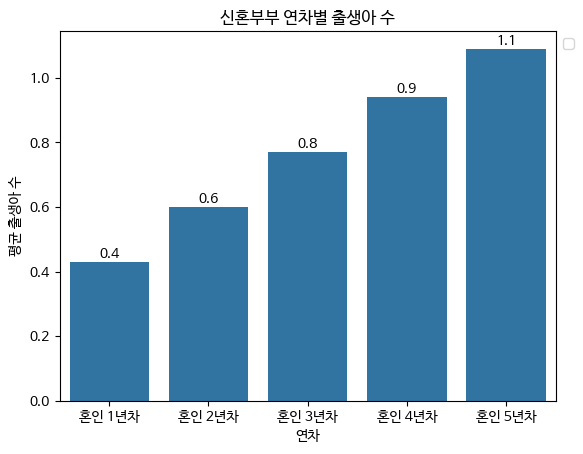

In [29]:
df_newly_birth_rate['평균 출생아 수'] = pd.to_numeric(df_newly_birth_rate['평균 출생아 수'])

plt.title('신혼부부 연차별 출생아 수')
barplot = sns.barplot(data=df_newly_birth_rate, x='연차', y='평균 출생아 수')

#그래프 값 표시
for bars in barplot.containers:
  barplot.bar_label(bars, fmt='%.1f')

#범례 위치 ㅈ정
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


In [30]:
#기혼여성의 자녀 필요성
params = {
    "apiKey": "OWVmNjBiOTgzZjhiNzYyNjYwNjU0YWUxYTNkYTAzMWM=",
    "itmId": "T001++",
    "objL1": "A01+",
    "objL2": "B01+B02+B03+B04+",
    "format": "json",
    "jsonVD": "Y",
    "prdSe": "Y",
    "newEstPrdCnt": "1",
    "orgId": "331", #데이터 제공 조직 ID (통계청, 신혼부부 통계)
    "tblId": "DT_331001_2021BI029",

}

# API 요청 보내기
response = requests.get(url, params=params)

# 응답 데이터 확인 및 JSON 데이터 파싱
if response.status_code == 200:
    need_children_data = response.json()

    data_list = []
    for item in need_children_data:
      data_list.append({
      "연도": item.get("PRD_DE"),
      "응답": item.get("C2_NM"),
      "응답률(%)": item.get("DT")

    })

    df_need_childern = pd.DataFrame(data_list)

else:
    print(f"Error: {response.status_code}")


In [31]:
#기혼여성의 이상 자녀수
params = {
    "apiKey": "OWVmNjBiOTgzZjhiNzYyNjYwNjU0YWUxYTNkYTAzMWM=",
    "itmId": "T001++",
    "objL1": "A01+",
    "objL2": "B01+B02+B03+B04+B05+B06+",
    "format": "json",
    "jsonVD": "Y",
    "prdSe": "Y",
    "newEstPrdCnt": "1",
    "orgId": "331", #데이터 제공 조직 ID (통계청, 신혼부부 통계)
    "tblId": "DT_331001_2021BI038",

}

# API 요청 보내기
response = requests.get(url, params=params)

# 응답 데이터 확인 및 JSON 데이터 파싱
if response.status_code == 200:
    num_children_data = response.json()

    data_list = []
    for item in num_children_data:
      data_list.append({
      "연도": item.get("PRD_DE"),
      "응답": item.get("C2_NM"),
      "응답률(%)": item.get("DT")

    })

    df_num_childern = pd.DataFrame(data_list)

else:
    print(f"Error: {response.status_code}")


([<matplotlib.patches.Wedge at 0x79254136ee60>,
 [Text(6.735557395310444e-17, 1.1, '0명'),
  Text(-0.48438348320632735, 0.987609559085424, '1명'),
  Text(-0.041500657221998465, -1.0992168555158452, '2명'),
  Text(0.7123521317804575, 0.8381852064715996, '3명'),
  Text(0.3956575336748338, 1.0263796159542278, '4명 이상'),
  Text(0.17224865143553078, 1.086430118359502, '모르겠음')],
 [Text(3.6739403974420595e-17, 0.6, '0.0%'),
  Text(-0.2642091726579967, 0.5386961231375039, '14.5%'),
  Text(-0.02263672212109007, -0.59957283028137, '69.8%'),
  Text(0.38855570824388586, 0.4571919308026906, '9.0%'),
  Text(0.21581320018627295, 0.5598434268841241, '1.7%'),
  Text(0.09395380987392586, 0.59259824637791, '5.0%')])

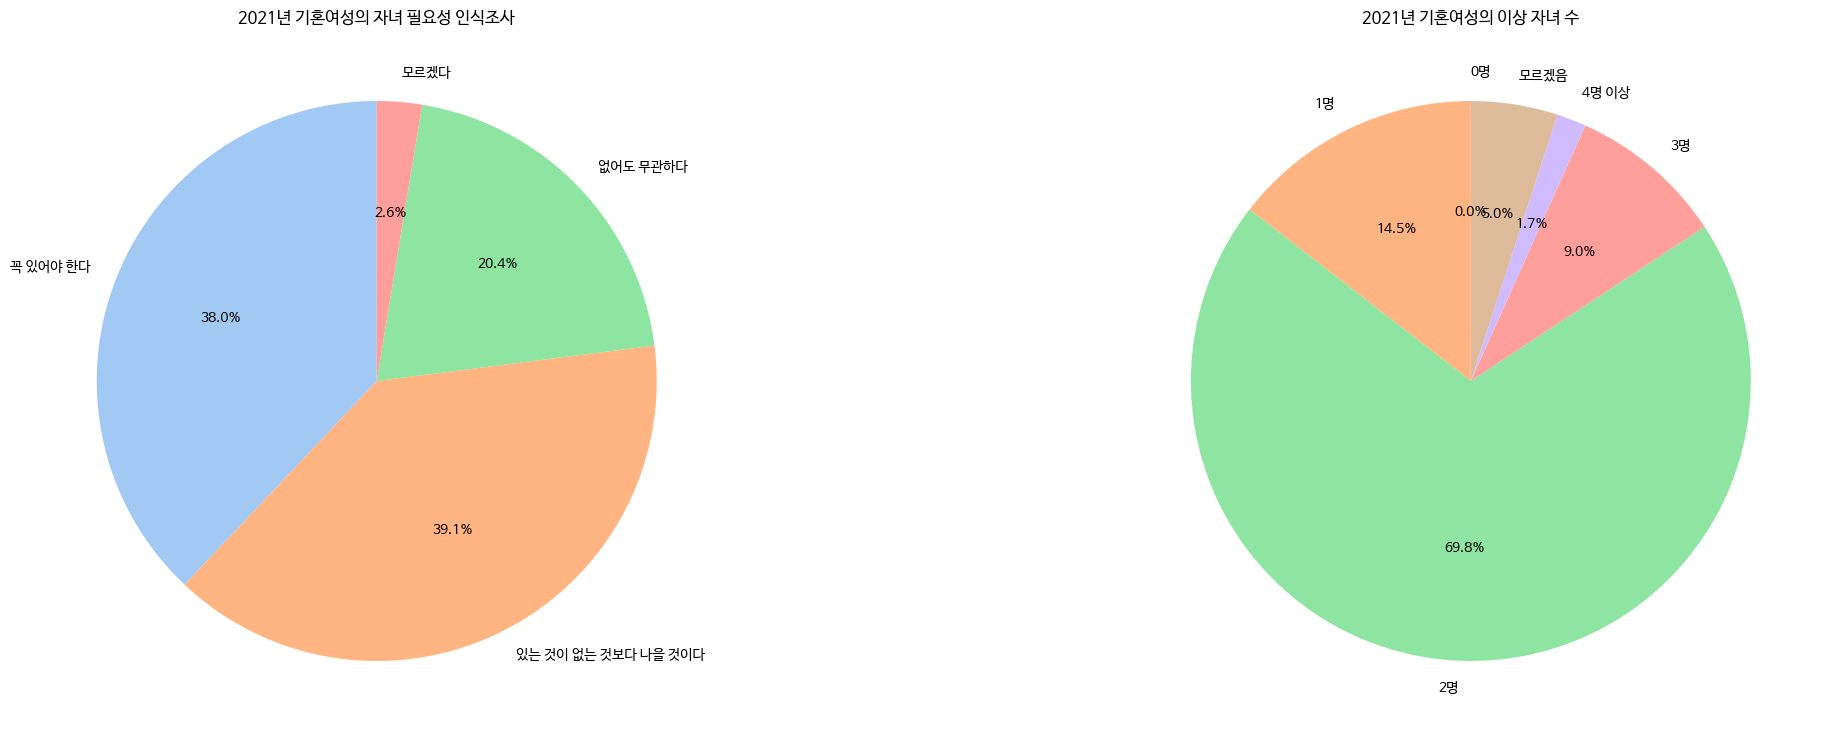

In [32]:
df_need_childern['응답률(%)'] = pd.to_numeric(df_need_childern['응답률(%)'])
df_num_childern['응답률(%)'] = pd.to_numeric(df_num_childern['응답률(%)'])


worked_hour_sub_plot = plt.figure(figsize=(40, 20))

ax1=worked_hour_sub_plot.add_subplot(2,3,1)
ax2=worked_hour_sub_plot.add_subplot(2,3,2)


ax1.set_title('2021년 기혼여성의 자녀 필요성 인식조사')
ax1.pie(
    df_need_childern["응답률(%)"],
    labels=df_need_childern["응답"],
    autopct="%.1f%%",
    colors=sns.color_palette("pastel"),
    startangle=90
)

ax2.set_title("2021년 기혼여성의 이상 자녀 수")
ax2.pie(
    df_num_childern["응답률(%)"],
    labels=df_num_childern["응답"],
    autopct="%.1f%%",
    colors=sns.color_palette("pastel"),
    startangle=90
)



In [131]:
#OECD 육아휴가 (여성)
try:
    parental_leave_to_mom = pd.read_excel(file_path+'여성육아휴가.xlsx', engine='openpyxl', header=1, index_col=0) #index_col = 국가 이름을 인덱스로 지정

    df_parental_leave_to_mom = pd.DataFrame(parental_leave_to_mom)
    df_parental_leave_to_mom = df_parental_leave_to_mom.loc[:, [2023]] #2023년 데이터만 저장

except Exception as e:
    print("파일을 읽는 중 오류 발생:", e)

In [125]:
#OECD 육아휴가 (남성)
try:
    parental_leave_to_fat = pd.read_excel(file_path+'남성육아휴가.xlsx', engine='openpyxl', header=0, index_col=0) #index_col = 국가 이름을 인덱스로 지정

    df_parental_leave_to_fat = pd.DataFrame(parental_leave_to_fat)
    df_parental_leave_to_fat = df_parental_leave_to_fat.loc[:, [2023]] #2023년 데이터만 저장

except Exception as e:
    print("파일을 읽는 중 오류 발생:", e)

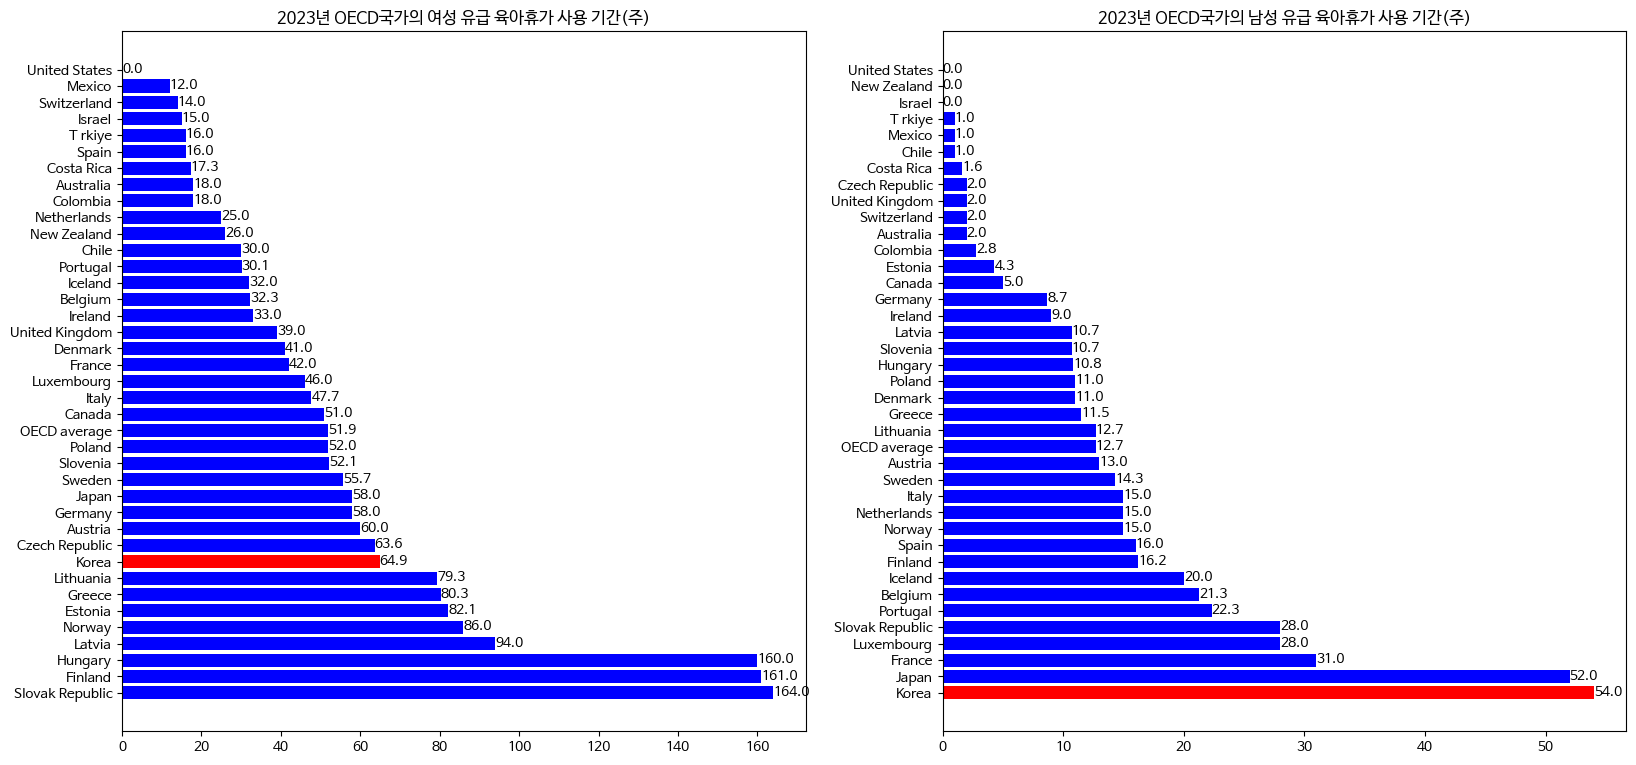

In [133]:
# 산모 출산나이 그래프 그리기
parental_leave_sub_plot = plt.figure(figsize=(30, 20))


ax1 = parental_leave_sub_plot.add_subplot(2, 3, 1)
ax2 = parental_leave_sub_plot.add_subplot(2, 3, 2)

ax1.set_title('2023년 OECD국가의 여성 유급 육아휴가 사용 기간(주)')

barplot1 = ax1.barh(
    df_parental_leave_to_mom.index,
    df_parental_leave_to_mom[2023],
    color=['blue' if country != 'Korea' else 'red' for country in df_parental_leave_to_mom.index]
)


for rect in barplot1:
    width = rect.get_width()
    ax1.text(
        width, rect.get_y() + rect.get_height() / 2,
        f'{width:.1f}',
        va='center', ha='left', color='black', fontsize=10
    )


ax2.set_title('2023년 OECD국가의 남성 유급 육아휴가 사용 기간(주)')


barplot2 = ax2.barh(
    df_parental_leave_to_fat.index,
    df_parental_leave_to_fat[2023],
    color=['blue' if country != 'Korea' else 'red' for country in df_parental_leave_to_fat.index]
)


for rect in barplot2:
    width = rect.get_width()
    ax2.text(
        width, rect.get_y() + rect.get_height() / 2,
        f'{width:.1f}',
        va='center', ha='left', color='black', fontsize=10
    )




In [152]:
#OECD 육아휴가 (여성)
try:
    expenditure = pd.read_excel(file_path+'가계지출.xlsx', engine='openpyxl', header=0, index_col=0) #index_col = 국가 이름을 인덱스로 지정

    df_expenditure = pd.DataFrame(expenditure)
    df_expenditure.columns = ['주택,전기,물 등 기타연료', '음식 및 음료(알콜X)', '교통', '기타 상품 및 서비스', '여가 및 문화', '레스토랑 및 호텔','가전, 가전제품 및 주택관리', '의류','알콜, 담배 및 마약', '건강','인터넷 및 핸드폰 요금', '교육','종합']
    df_expenditure_total = df_expenditure[['종합']]#종합 열 데이터 값은 따로 저장
    df_expenditure = df_expenditure.loc[['France', 'Japan', 'Korea', 'Italy', 'Germany']]
    df_expenditure = df_expenditure.drop(columns=['종합'])

    df_expenditure_total = df_expenditure_total.sort_values(by='종합', ascending=False)


except Exception as e:
    print("파일을 읽는 중 오류 발생:", e)

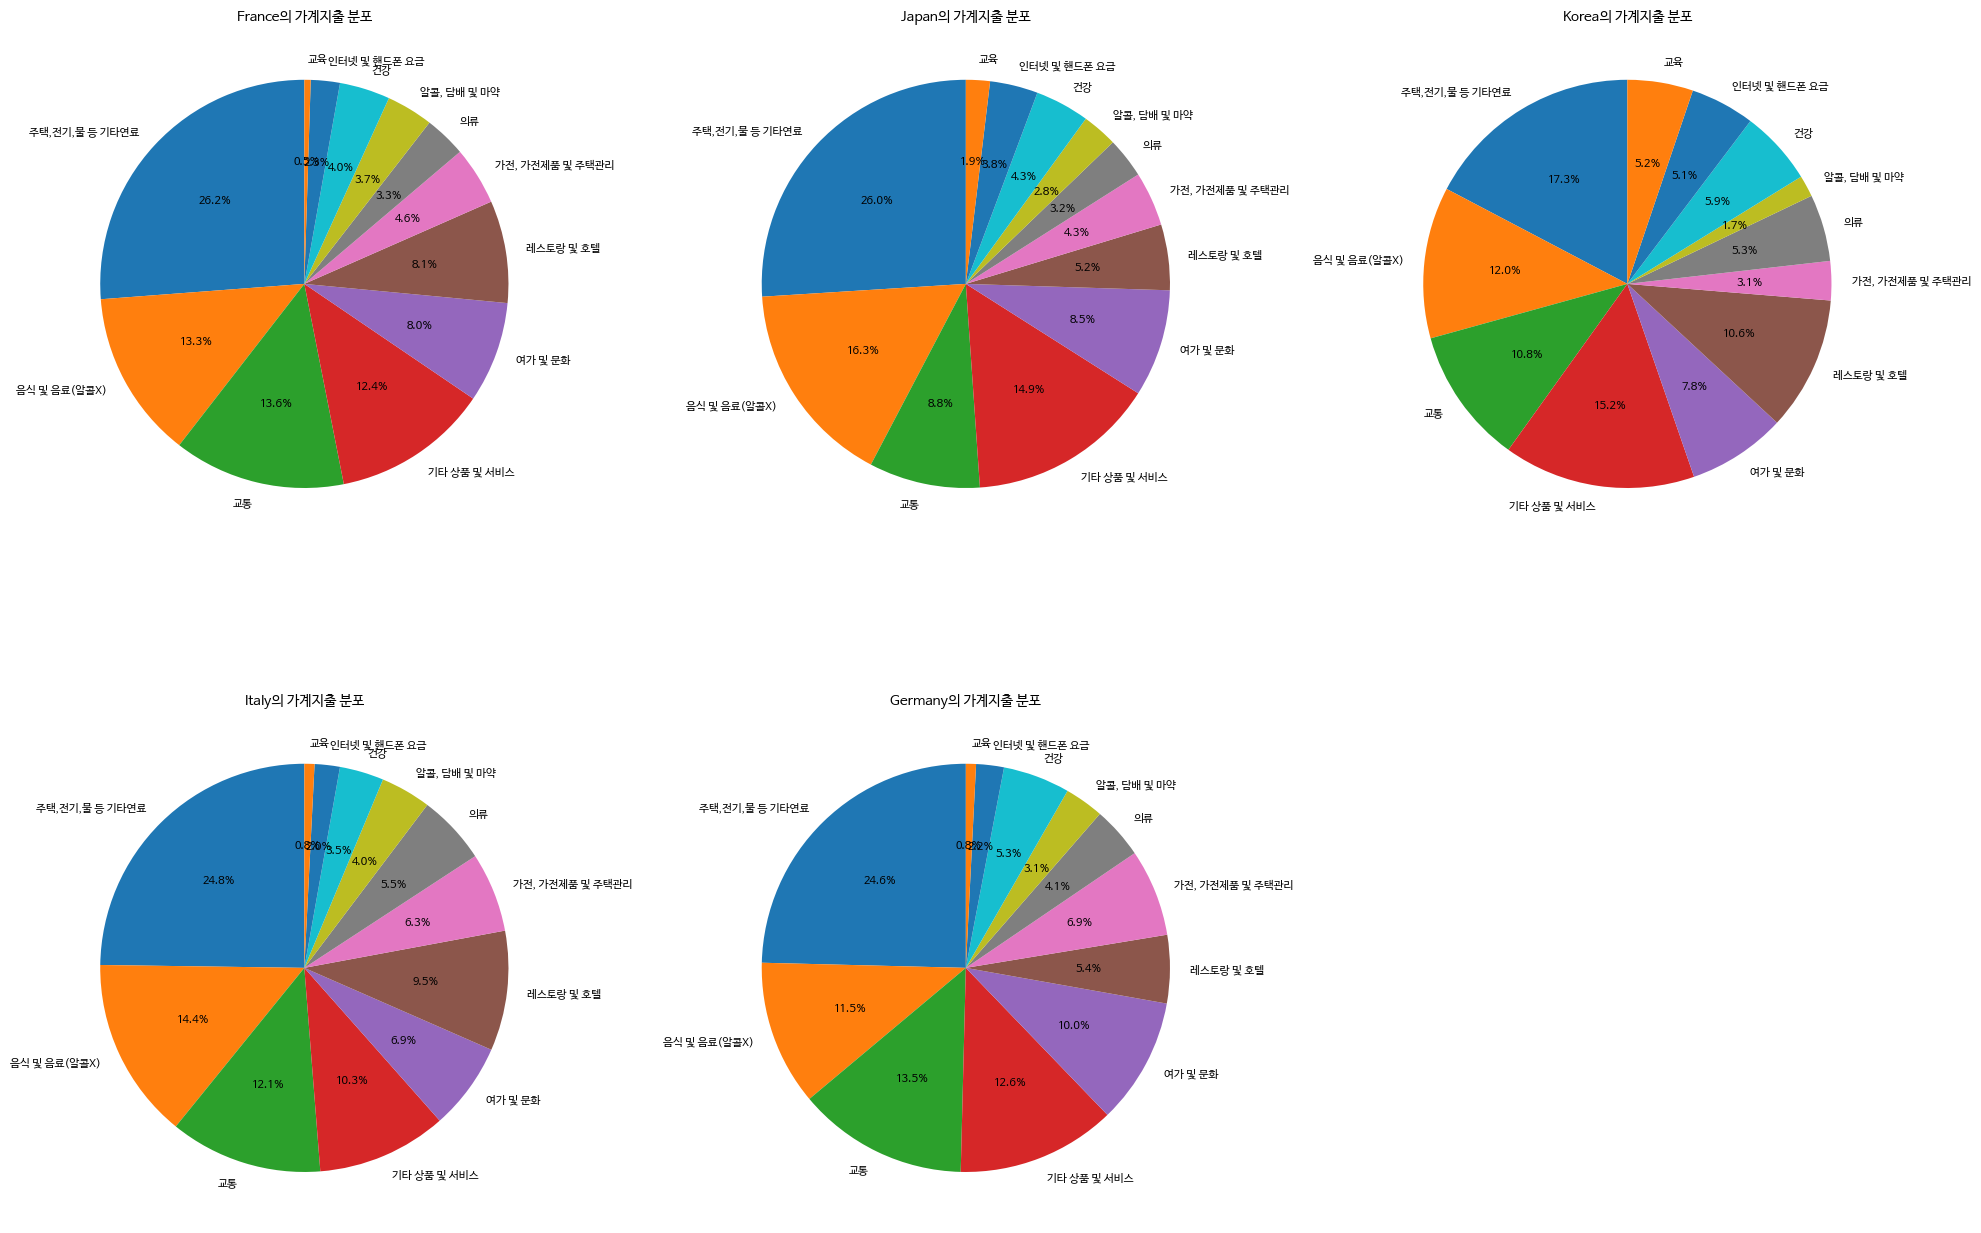

In [158]:
# 서브플롯 크기 설정 (국가 수에 맞게 서브플롯 개수 계산)
num_countries = len(df_expenditure.index)
rows = (num_countries + 2) // 3  # 3개씩 배치하므로 행 수 계산

# 서브플롯 생성
fig, axes = plt.subplots(rows, 3, figsize=(20, 7 * rows))

# 국가 리스트
countries = df_expenditure.index

# 각 국가에 대해 서브플롯에 파이 차트 생성
for i, country in enumerate(countries):
    # 행, 열 인덱스 계산
    row = i // 3  # 행 번호
    col = i % 3   # 열 번호

    # 서브플롯에 파이 차트 그리기
    axes[row, col].pie(
        df_expenditure.loc[country],
        labels=df_expenditure.columns,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 8},  # 글자 크기 줄이기
    )
    axes[row, col].set_title(f"{country}의 가계지출 분포", fontsize=10)  # 제목 글자 크기 조정

# 불필요한 빈 서브플롯 숨기기
for i in range(num_countries, rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


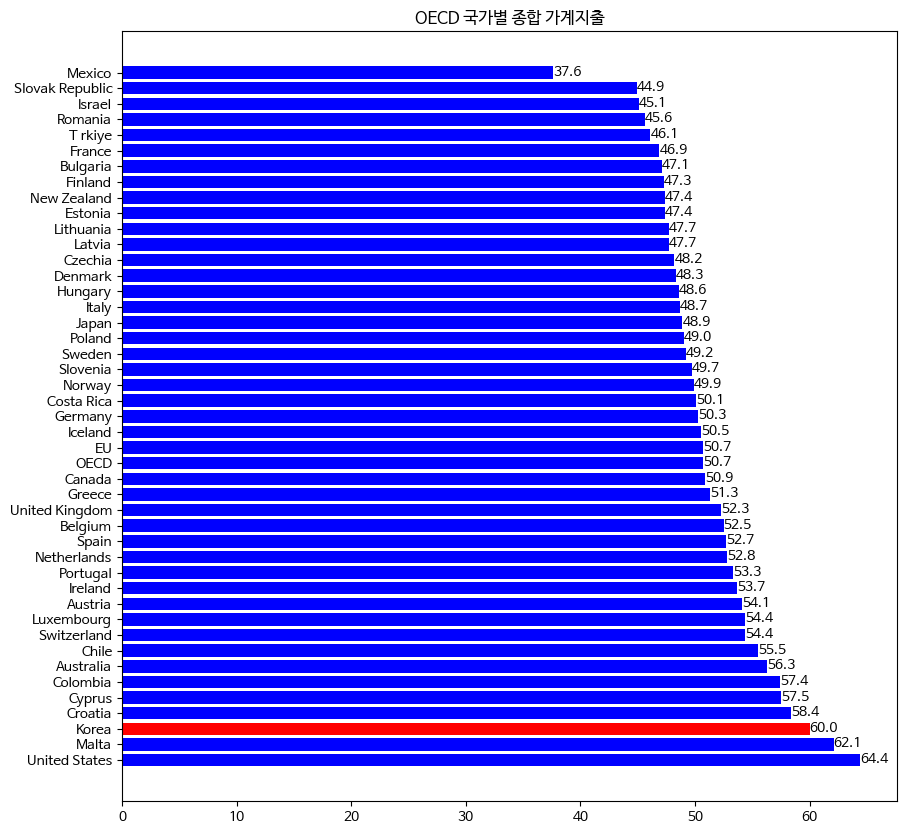

In [153]:
#가계지출
plt.figure(figsize=(10, 10))
plt.title('OECD 국가별 종합 가계지출')

barplot = plt.barh(
    df_expenditure_total.index,
    df_expenditure_total['종합'],
    color=['blue' if country != 'Korea' else 'red' for country in df_expenditure_total.index]
)

# 각 바 끝부분에 값을 표시
for rect in barplot:
    width = rect.get_width()
    plt.text(
        width, rect.get_y() + rect.get_height() / 2,
        f'{width:.1f}',
        va='center', ha='left', color='black', fontsize=10
    )
